# Identification of genetically plastic forms among Belarusian ancient flax (Linum usitatissimum L.) varieties using the Linum insertion sequence as a marker of genotypes with high adaptive potential

### Abstract
The Linum Insertion Sequence (LIS-1) occurs in the reacting flax genome in response to the particular conditions of mineral and water nutrition and can be stably transmitted to the progeny. We have analyzed 29 ancient Belarusian varieties (405 plants) of flax Linum usitatissimum L., var. elongatum. The plants used were grown at the Biological Experimental Station of the Institute of Genetics and Cytology. The LIS-1 presence or absence was checked for the individual plants in two or three generations with primer-specific polymerase chain reaction (PCR) and agarose gel-electrophoresis. The studied flax varieties formed four groups: 1) non-reacting varieties (the LIS-1 was not found, k-784, k-596, k-781); 2) reacting unstable (group "pl"), which formed the insertion and partially lost it in a number of generations, k-595, k-6220, k-5463, k-5464, k-6213, k-6217, k-777, k-1453, k-6218, k-6219); 3) reactive stable, which completely lost the insertion (group "0", k-6216, k-791, k-1043, k-1424); 4) reactive stable, that retained the LIS-1 (group "1", k-776, k-5462, k-6214, k-6222, k-786, k-787, k-789, k-1044, k-6215). A statistically significant difference was found by the number of seeds between the groups "1" and "pl": p-value = 0.00167); by the length of the plant, the Mann-Whitney test showed a significant difference between the groups "1" and "0" (p-value = 0.006), a one-factor ANOVA between the groups "1" and "pl" (p-value = 6.6e-9). The machine learning algorithm Random Forest Classifier was used to predict the presence, absence, or heterozygosity of LIS-1 in 56 flax plants based on their characteristics. As a result, the accuracy of the prediction was 99.14% on train data and 98.039% on test data.
### Keywords: 
flax, Linum usitatissimum L. var elongatum, linum insertion sequence (LIS-1), local varieties, machine learning, random forest classifier

The aim of this study was to investigate ancient Belarusian flax varieties with the LIS-1 insertion as a marker of genome plasticity. The second goal was to construct a classification model to predict the presence or absence of the LIS-1 insertion based on the available morphological features using a random forest classifier.

## Materials and Methods

### plant material
For the analysis, 29 ancient varieties of flax Linum usitatissimum L. were taken. On the map (Figure 1) the sampling points are marked.

### Place and conditions of growth of plant material, collection of leaves for genetic analysis.
The studied local ancient varieties of flax (29 varieties, 405 plants in total) were sowing and cultivation in the Biological Experimental Station of the Institute of Genetics and Cytology in Minsk from 2011 to 2022. Nitrogen fertilizer was applied to the soil in accordance with the field fertilization schedule, both when preparing the soil for seeding and during plant growth. Plants were watered as needed. Each year, several varieties were tested for the presence or absence of an insertion. For those varieties in which it was not found, no further studies were conducted. For those cultivars in which LIS-1 was found, the studies continued for the next year, i.e., seeds were collected from each plant found to have LIS-1. The next year, they were planted (5–10 seeds), and the presence or absence of LIS-1 was checked again. For each variety (exception: k-782, k-5461, and k-780 varieties), there are two- or three-year generations of plants with traceable LIS-1 presence or loss. Morphometric measurements were carried out for each plant.
Weather conditions (temperature of the air and precipitation) during the flax vegetation period from may to august are shown on the  (figure 2) . 

In [1]:
# Import modules

import folium
import io
from PIL import Image
from folium import plugins
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from PIL import Image


In [2]:
# Load database df_fen phenotypes and lis polymorphisms
df = pd.read_excel("~/db/flax_data_anova.ods", sheet_name='map')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Variety    29 non-null     object 
 1   latitude   29 non-null     float64
 2   longitude  29 non-null     float64
 3   var_num    29 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 1.0+ KB


In [3]:
# Load map of Belarus
loc_center = [df['latitude'].mean(), df['longitude'].mean()]

In [4]:
# Add locations of the studied linum accessions to the map
map_heatmap = folium.Map(location = loc_center, tiles='CartoDB Positron', zoom_start = 6.5, control_scale=True)

#Create Latitude, Longitude, origin of plant material
k_596 = [52.2, 29.4, 1]
k_776 = [55.2, 29.0, 2]
k_781 = [53.4228, 28.2556, 3]
k_595 = [52.2, 29.4, 1]
k_782 = [53.302592, 28.090792, 4]
k_784 = [54.2259, 30.2451, 5]
k_786 = [54.2259, 30.2451, 5]
k_787 = [54.2259, 30.2451, 5]
k_789 = [54.2259, 30.2451, 5]
k_791 = [53.34, 31.22, 6]
k_1043 = [55.28, 28.48, 7]
k_1044 = [55.28, 29.59, 8]
k_5461 = [54.29, 26.55, 9]
k_5462 = [54.53, 27.46, 10]
k_5463 = [55.07, 26.50, 11]
k_5464 = [55.6657, 28.1343, 12]
k_6213 = [55.22, 27.28, 13]
k_6214 = [55.08, 27.41, 14]
k_6215 = [53.3459, 25.49, 15]
k_6216 = [52.2257, 25.1159, 16]
k_6217 = [53.184, 26.0554, 17]
k_6218 = [53.55, 25.46, 18]
k_6219 = [52.0858, 25.3206, 19]
k_6220 = [52.2257, 25.1159, 16]
k_777 = [55.2, 29.0, 2]
k_780 = [53.4, 27.45, 20]
k_1424 = [55.2, 29.0, 2]
k_1453 = [55.2, 29.0, 2]
k_6222 = [53.34, 26.08, 21]

linums = [k_596, k_776, k_781, k_595, k_782, k_784, k_786, k_787, k_789, k_791, 
          k_1043, k_1044, k_5461, k_5462, k_5463, k_5464, k_6213, k_6214, k_6215, k_6216, k_6217, k_6218,
         k_6219, k_6220, k_777, k_780, k_1424, k_1453, k_6222]

plugins.HeatMap(linums, 
                name="Accessions", 
                radius=8,
                ).add_to(map_heatmap)

In [5]:
# Add locations of the studied linum accessions to the heat map

map2 = folium.Map(location = loc_center, tiles='CartoDB Positron', zoom_start = 7, control_scale=True)

for i in df.itertuples():
  folium.Marker(location=[i.latitude, i.longitude],
                popup = i.Variety,
                icon = plugins.BeautifyIcon(number=i.var_num,
                                            border_color='gray',
                                            border_width=2,
                                            text_color='white',
                                            inner_icon_style='margin-top:0px;color:black;font-size:15px;',
                                            background_color='transparent',
                                            spin=False,
                                            icon_shape='circle',
                                            opacity=0.8
                                            )).add_to(map2)
plugins.HeatMap(linums, 
                name="Accessions", 
                radius=9,
                min_opacity = 0.99,
                ).add_to(map2)

In [6]:
#Resize the Map

from branca.element import Figure
fig = Figure(width=900, height=900)
fig.add_child(map2)
map2

img_data2 = map2._to_png(5)
img3 = Image.open(io.BytesIO(img_data2))
img3.save('flax_map.png')

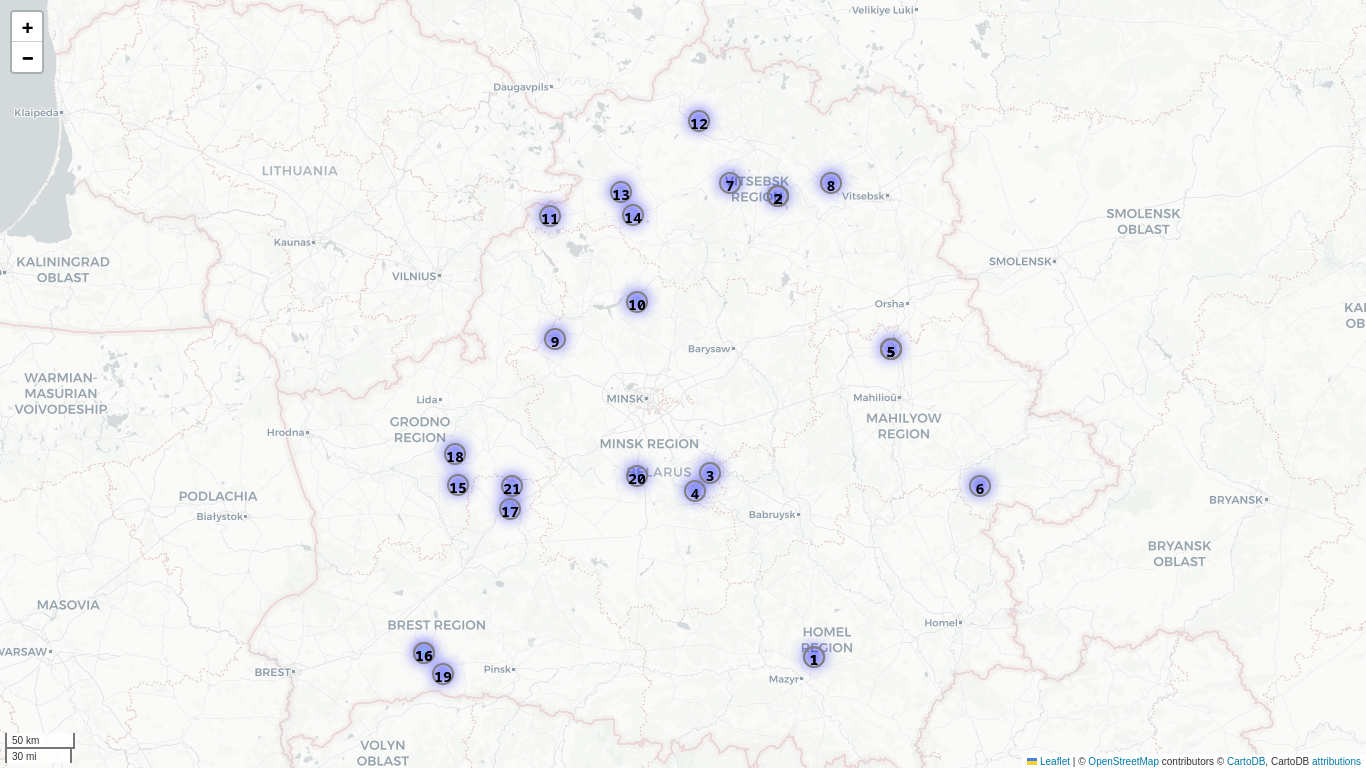

In [7]:
# Figure 1. Plant material origin.
map_flax = Image.open("map_flax.png")
display(map_flax)

### Figure 1. Plant material origin. 
1 - k-595, k-596 (Homielskaja vobłasć); 2 - k-776, k-777, k-1414, k-1453 (Viciebskaja vobłasć); 3 - k-781 (Minskaja vobłasć, Červieński rajon); 4 - k-782 (Minskaja vobłasć, Puchavicki rajon); 5 - k-784, k-786, k-787, k-789 (Biełaruś); 
6 - k-791 (Mahiloŭskaja vobłasć, Čerykaŭski rajon); 7 - k- 1043 (Viciebskaja vobłasć, Połacki rajon); 8 - k-1044 (Viciebskaja vobłasć, Haradocki rajon); 9 - k-5461 (Minskaja vobłasć, Kryvicki rajon); 10 - k-5462 (Minskaja vobłasć, Dokšycki rajon); 
11 - k-5463 (Viciebskaja vobłasć, Pastaŭski rajon); 12 - 5464 (Viciebskaja vobłasć, raka Dzisna); 
13 - k-6213 (Viciebskaja vobłasć, Šarkaŭščynski rajon); 
14 - k-6214 (Viciebskaja vobłasć, Hłybocki rajon); 
15 - k-6215 (Hrodzienskaja vobłasć, Navahrudski rajon); 16 - k-6216, k-6220 (Bresckaja vobłasć); 
17 - k-6217 (Bresckaja vobłasć); 18 - k-6218 (Hrodzienskaja vobłasć, Iŭjeŭski rajon); 19 - k-6219 (Bresckaja vobłasć, Ivanaŭski rajon);
20 - k-780 (Minskaja vobłasć); 21 - k-6222 (Hrodzienskaja vobłasć, Karelicki rajon).

### Weather conditions during flax vegetation period.

In [8]:
# Load weather conditions - temperature and precipitation during the flax vegetation period (may- august)
df_w = pd.read_excel('~/db/flax_data_anova_w1.ods', sheet_name='weather')
df_w.head()

,year,month,T_avg,"Rain, mm"
0,2011,may,13.6,81
1,2011,june,18.8,69
2,2011,july,20.2,140
3,2011,august,17.9,79
4,2012,may,14.7,44


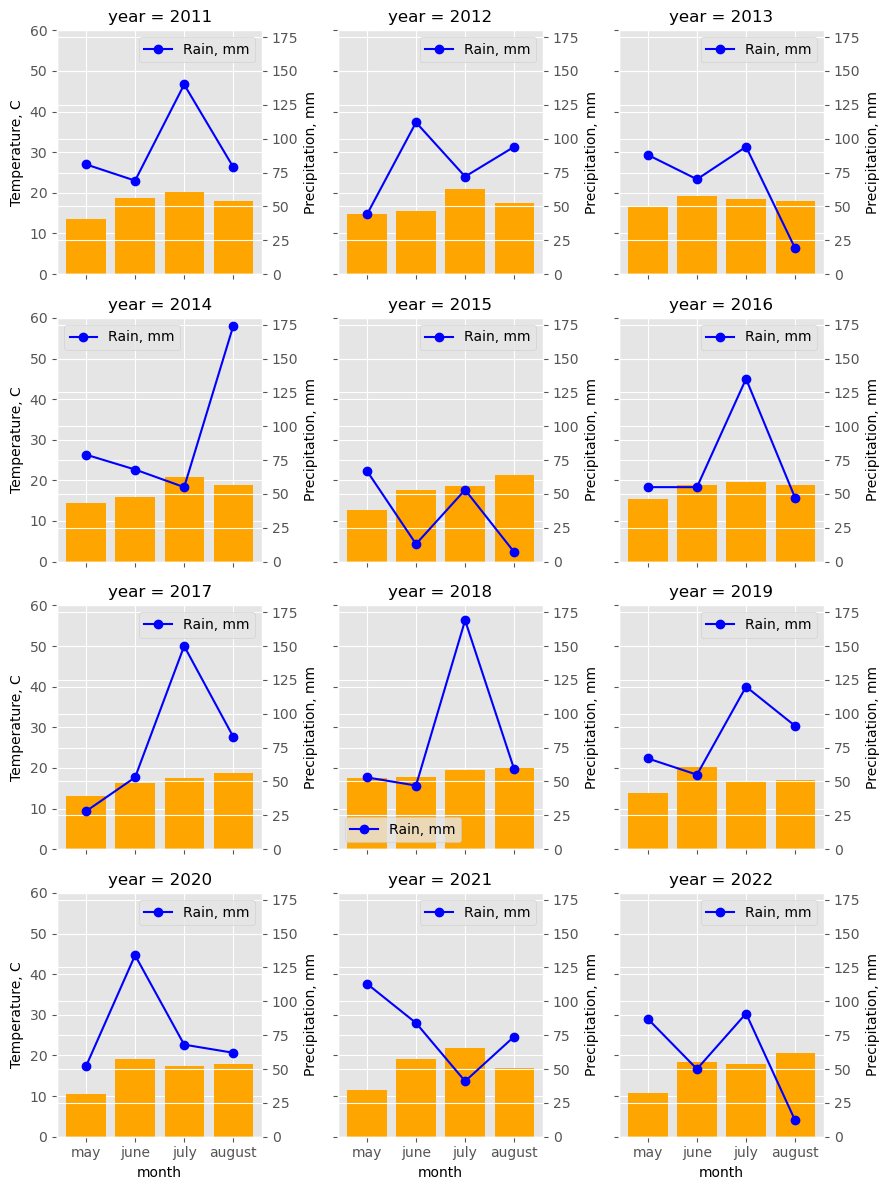

In [9]:
# Precipitation, mm and Temperature, C, in may, june, jully and august. 
plt.style.use('ggplot')
g = sns.FacetGrid(df_w, col="year", col_wrap=3, sharex=True)
g = g.map(plt.bar, "month", "T_avg", color="orange", linewidth=1)
for ax, (_, subdata) in zip(g.axes, df_w.groupby('year')):
    ax2=ax.twinx()
    ax2.set_ylim(0, 180)
    ax.set_ylim(0, 60)
    subdata.plot(x="month",y="Rain, mm", ax=ax2,legend=True,color='blue', marker='o')
    ax.set_ylabel('Temperature, C')  
    ax2.set_ylabel('Precipitation, mm')
    
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
g.tight_layout()

### Figure 2. Weather conditions (temperature of the air and precipitation) during the flax vegetation period from May to August by year.

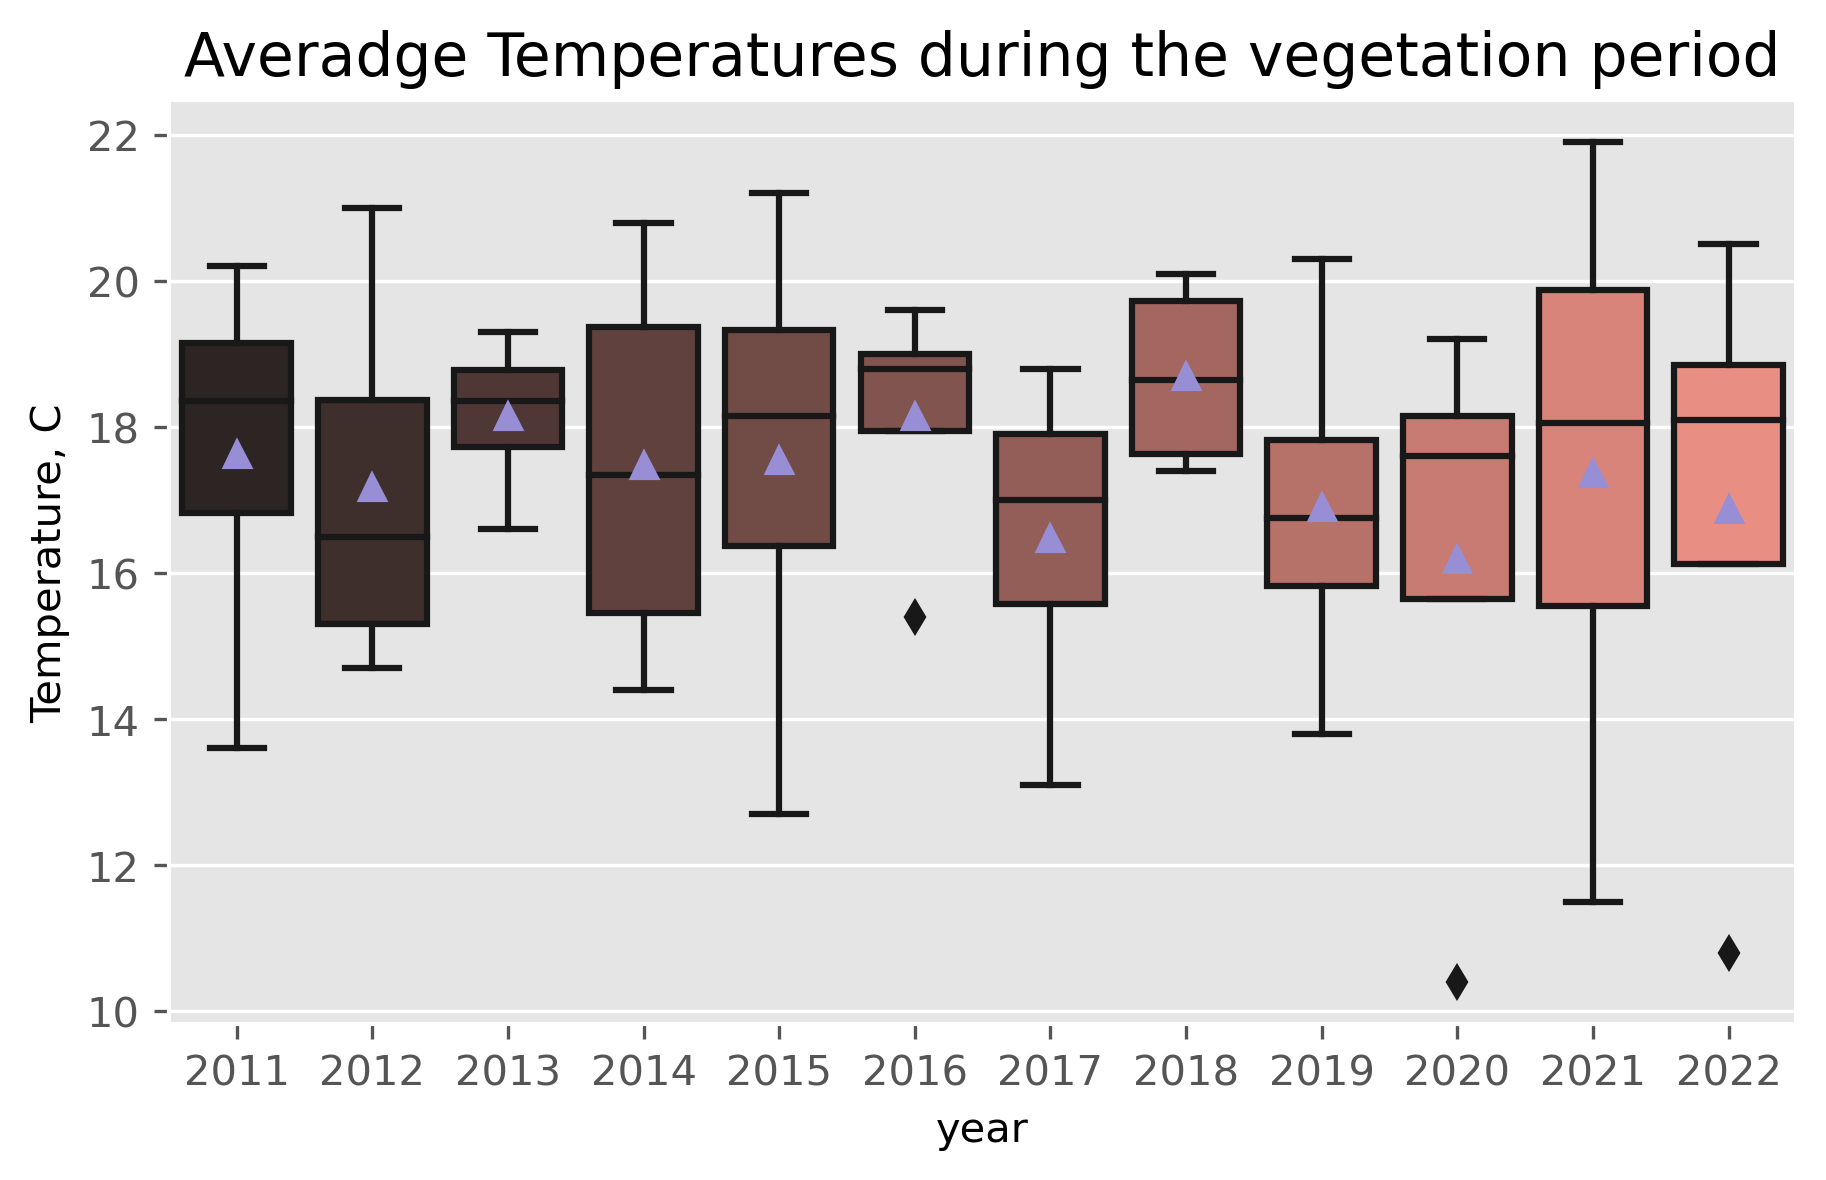

In [10]:
# Plot average temperatures of the vegetation period by year

plt.rcParams.update({'figure.figsize':(7, 4), 'figure.dpi':300})
sns.boxplot(x = 'year', y = 'T_avg', data = df_w, palette = 'dark:salmon', showmeans=True)
plt.ylabel('Temperature, C')
plt.title('Averadge Temperatures during the vegetation period')
plt.show()

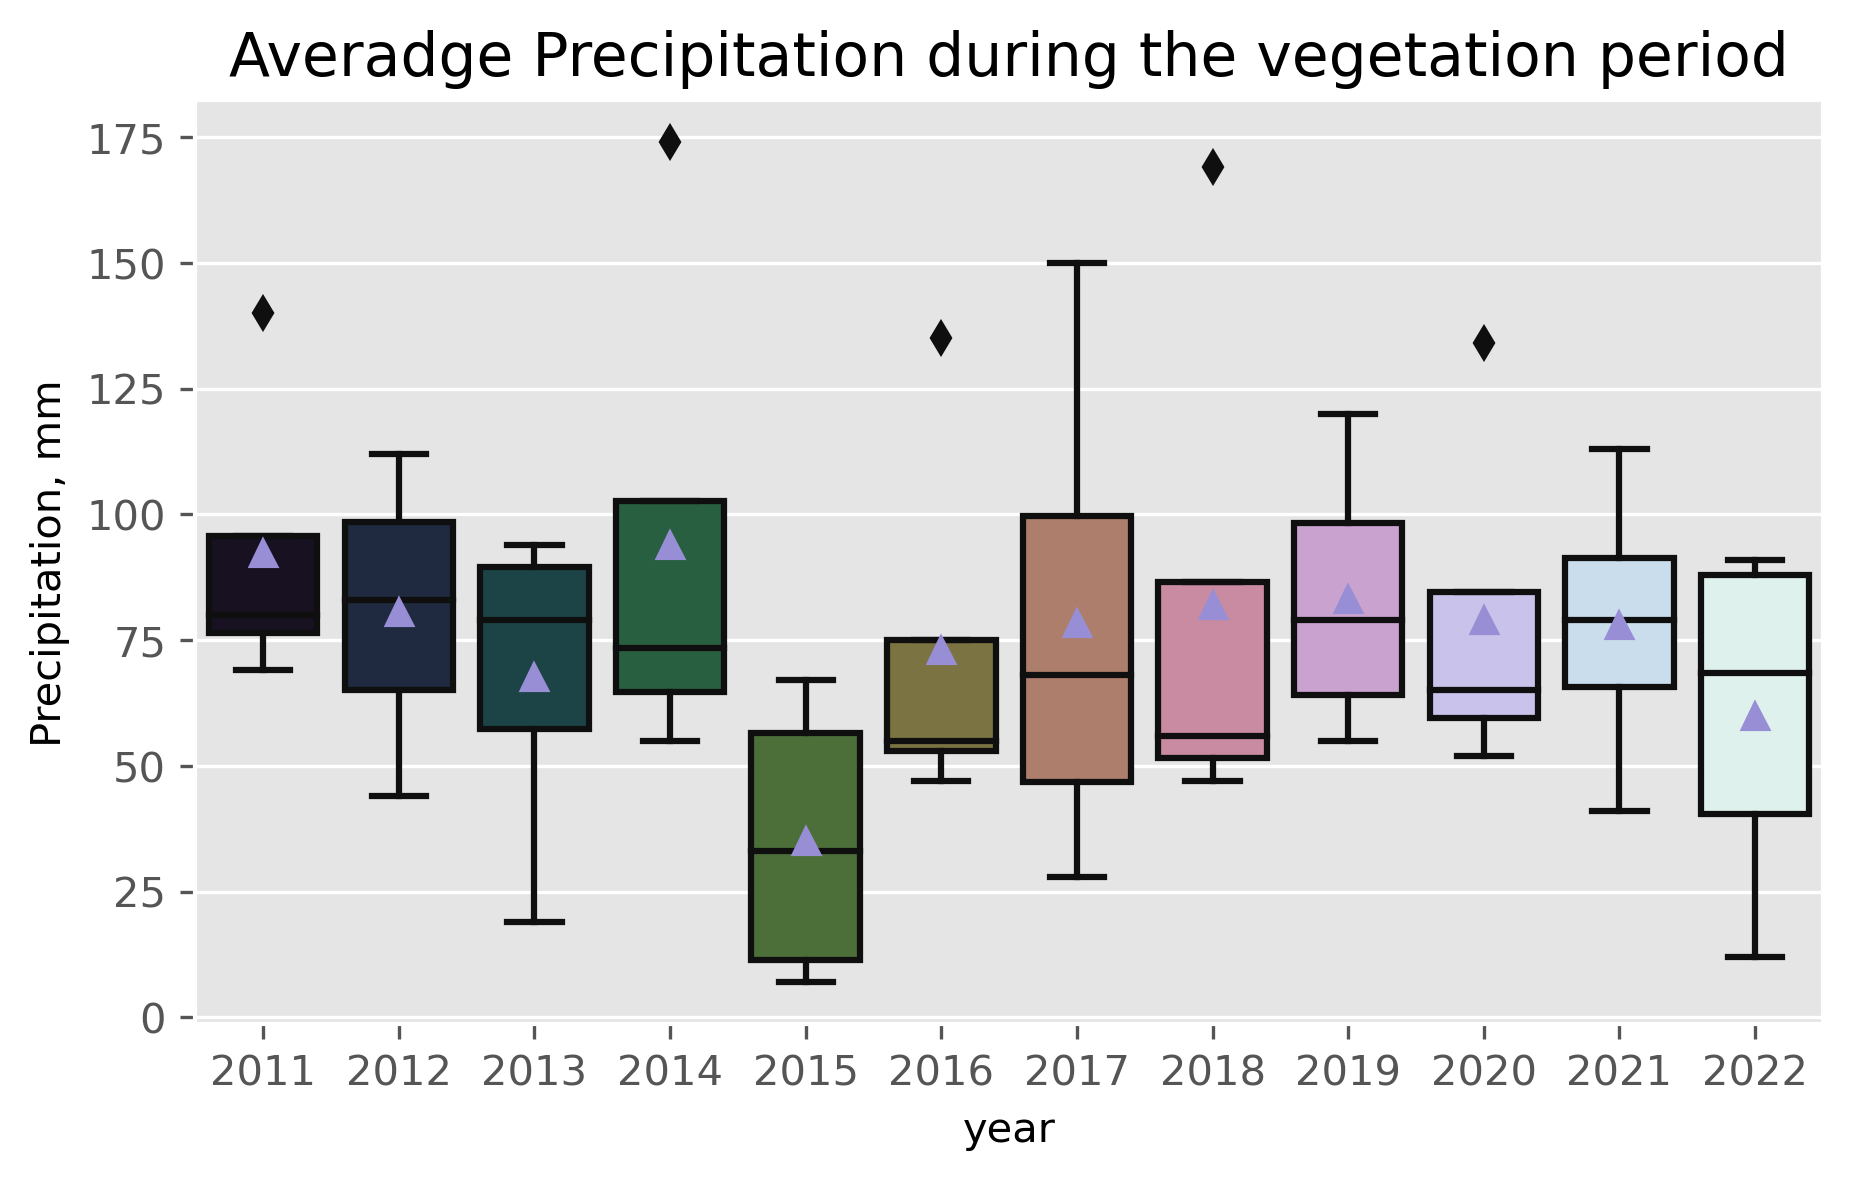

In [11]:
# Plot average precipitation of the vegetation period by year

plt.rcParams.update({'figure.figsize':(7,4), 'figure.dpi':300})
sns.boxplot(x = 'year', y = 'Rain, mm', data = df_w,palette = 'cubehelix', showmeans=True)
plt.ylabel('Precipitation, mm')
plt.title('Averadge Precipitation during the vegetation period')
plt.show()

### Characteristics of the plants

The features by which the studied varieties were characterized were as follows: morphological features of the flower and stem. For the flower, the following were detected: shape, degree of opening, diameter, shape of the petals, the surface of the petals, the color of the petals, the color of the veins of the petals, the color of the anthers; for the stem: foliage; for the bioinformatics analysis, also hairs on the false capsule septa were investigated. Morphological features were: the total height of the plant; the technical length of the plant; the number of productive seed capsules per plant; and the number of seeds in the capsule.

Morphological characteristics of the studied linum varieties are shown on thw Figure 3. The eVenn diagramm was used to visualize the shared and individual features of the flax varieties. The analysis was run online: Tong Chen, Haiyan Zhang, Yu Liu, Yong-Xin Liu, Luqi Huang. EVenn: Easy to create repeatable and editable Venn diagrams and Venn networks online. Journal of Genetics and Genomics. 2021 Aug 2. doi: 10.1016/j.jgg.2021.07.007. http://www.ehbio.com/test/venn/#/ 

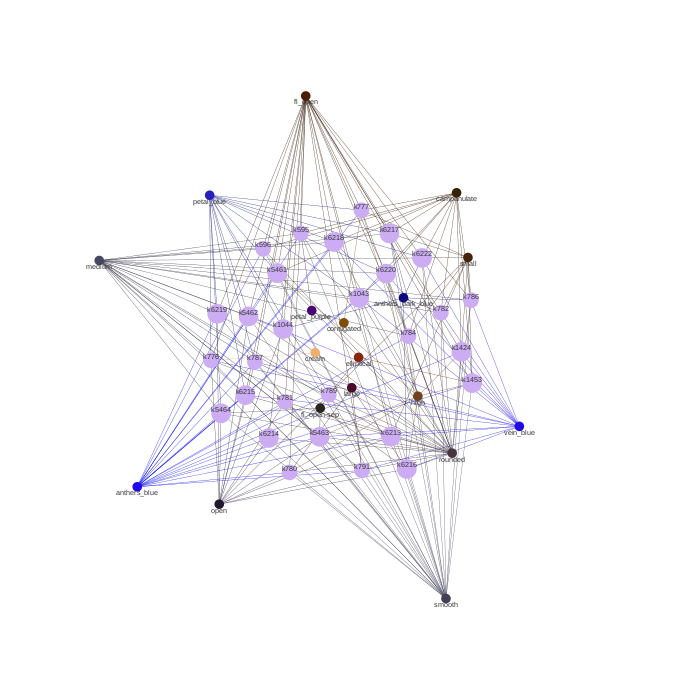

In [12]:
#Open Figure 3. Characteristic of the varieties by morphological features.
from PIL import Image
myImage = Image.open("morph_flax.tif")
display(myImage)

### Figures 3. Characteristic of the varieties by morphological features. 

The flowers differed in diameter, from small (less than 22 mm in diameter) (k-782, k-784, k-6213, k-6217, k-6222) to large (more than 24 mm) (k-791, k-6216).According to the color of the flower petals and the color of the anthers, the following combinations were noted: violet - blue, blue - cream, pale blue - blue, pale blue - blue, blue - blue, blue - blue. Only one variety has cream color of the anthers (k-776), and only one has a corrugated surface of the petals (k-777).
The majority of studied Belarusian ancient varieties have a medium flower diameter (22–23 mm), an open shape of the flower with rounded petals, and a blue color of the flower petals, anthers, and veins of the petals.

## Presence of the LIS-1
 
The studied flax varieties could be divided into four groups, corresponding to LIS-1 presence and preservation:
1) non-reacting varieties (those in which the insertion was not found: k-784, k-596, k-781) (Figure 4, GitHub project);
2) reacting unstable (those that formed the insertion and then partially lost it in a number of generations: k-595, k-6220, k-5463, k-5464, k-6213, k-6217, k-777, k-1453, k-6218, k-6219) (Figure 5, GitHub project);
3) reactive stable, completely lost the insertion (those that formed the insertion and then, in a number of generations, completely lost it: k-6216, k-791, k-1043, k-1424) (Figure 6, GitHub project);
4) reactive stable ones that retained the insertion (those that formed the insertion and retained it in a number of generations—k-776, 5462, 6214, 6222, 786, 787, 789, 1044, 6215) (Figure 7, GitHub project).

We will designate the group of varieties that formed and retained the insertion as group "1", the group of varieties that formed and completely lost the insertion as group "0", the group of varieties formed and partially lost the insert as group "pl".

On the figures 4-7 red color indicate plants with the presence LIS-1 insertion, blue color — absence LIS-1.

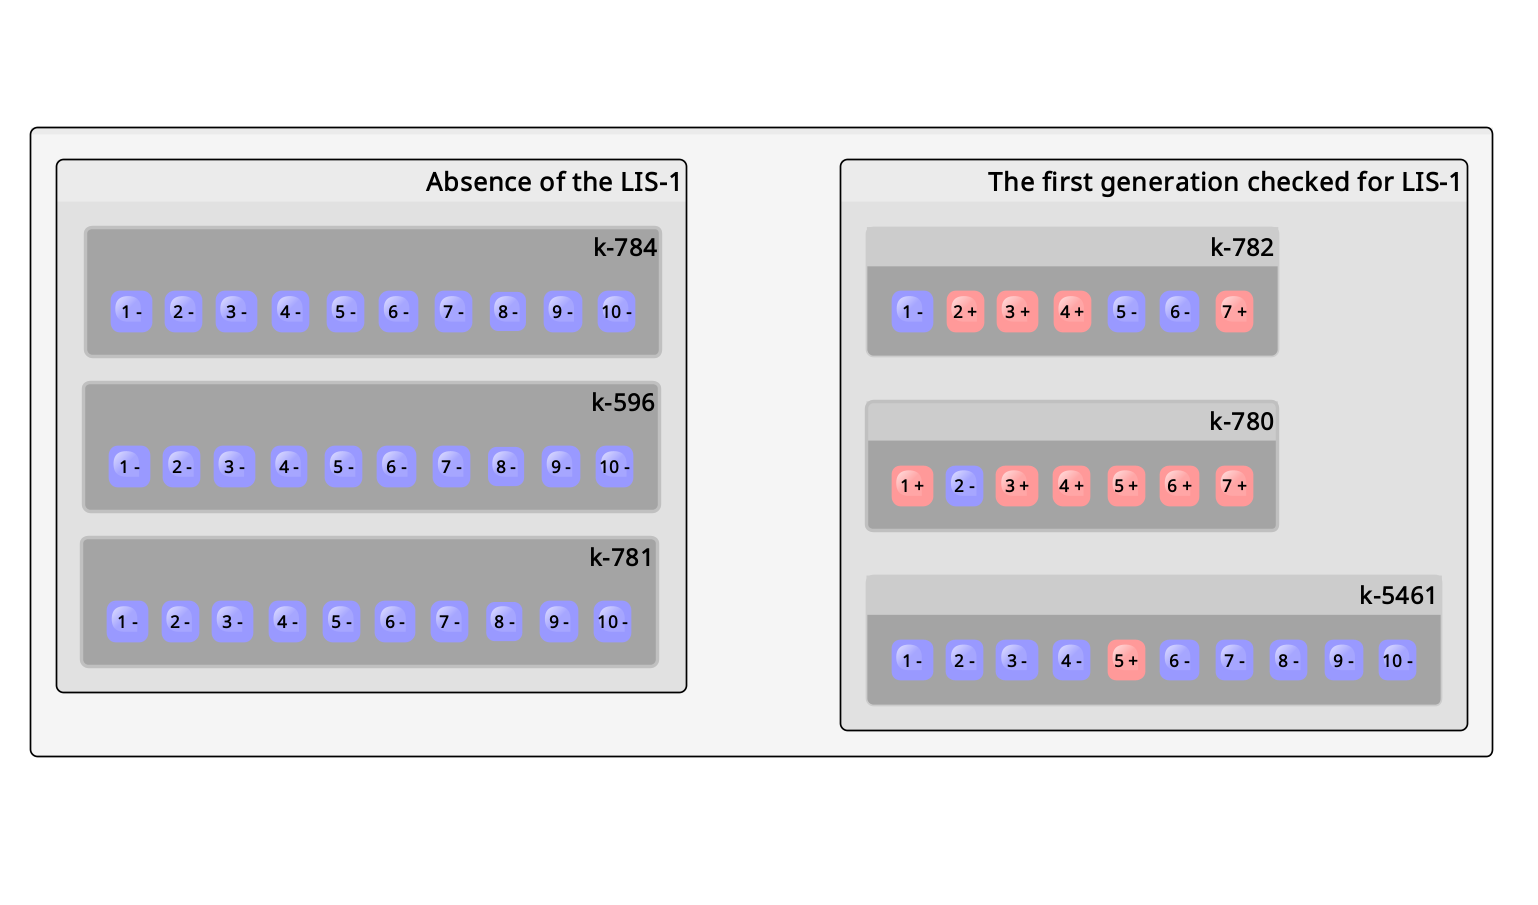

In [13]:
# Figure 4. Non-reacting varieties.
non_reacting = Image.open("not.png")
display(non_reacting)

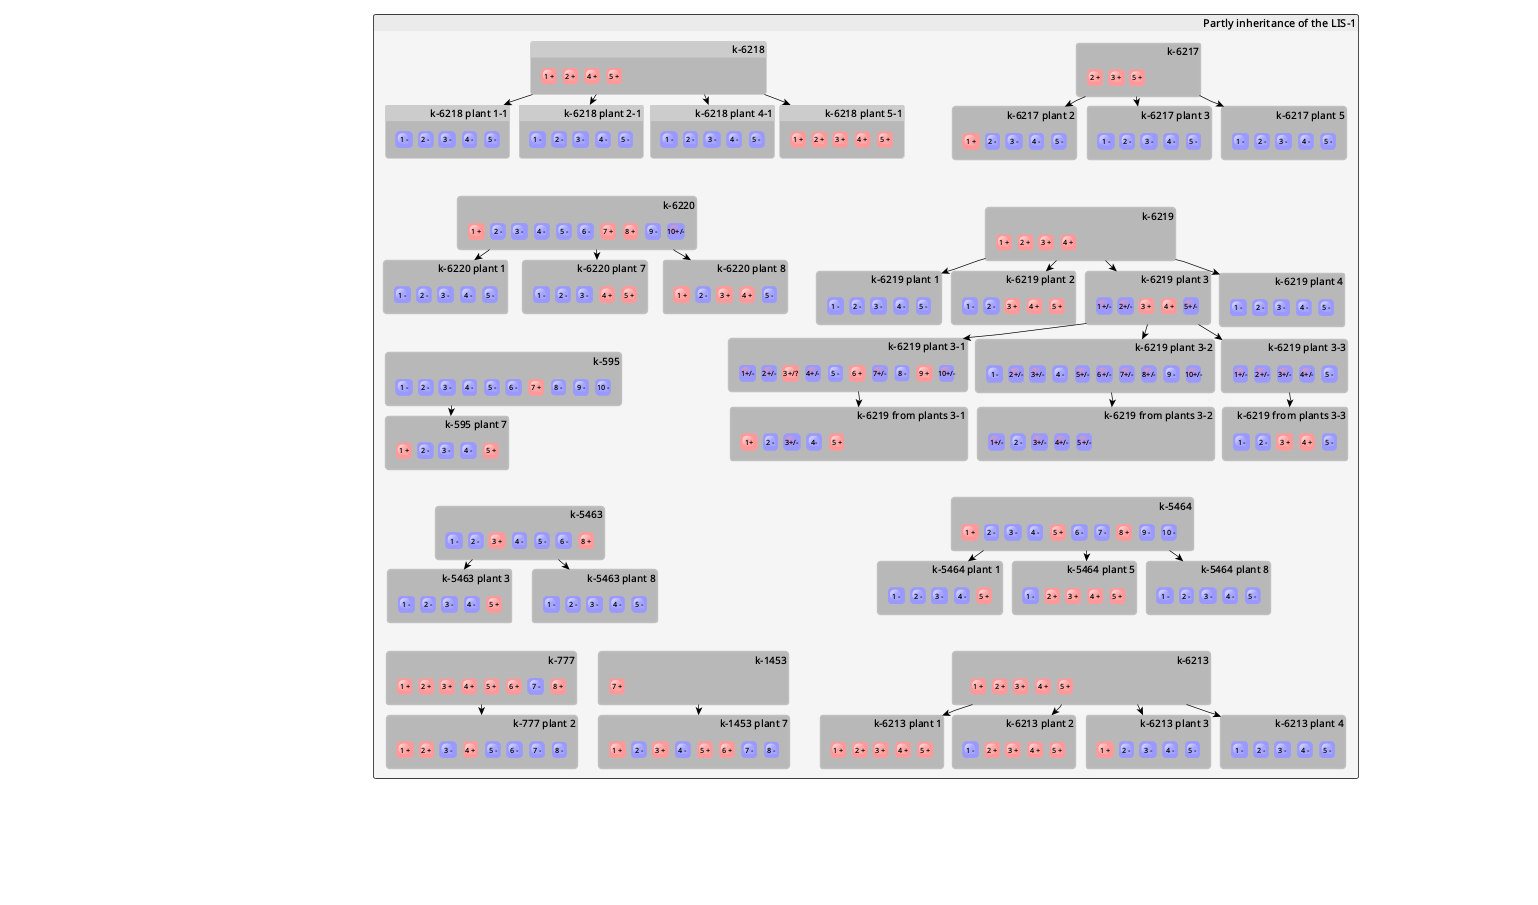

In [14]:
# Figure 5. Reacting unstable varieties.
unstable = Image.open("partly_lost.png")
display(unstable)

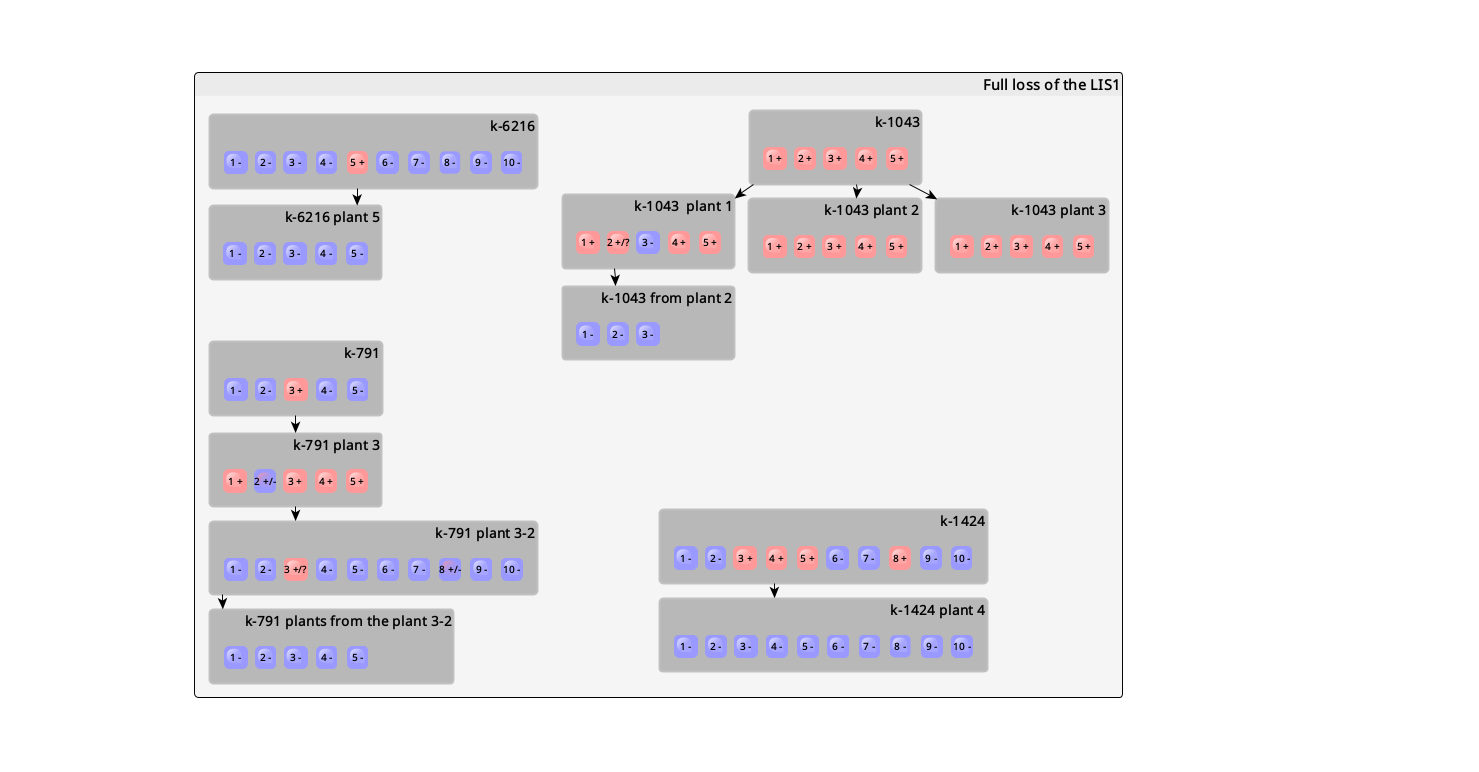

In [15]:
# Figure 6. Reactive stable varieties, completely lost the insertion .
loss_lis = Image.open("full_loss_lis.png")
display(loss_lis)

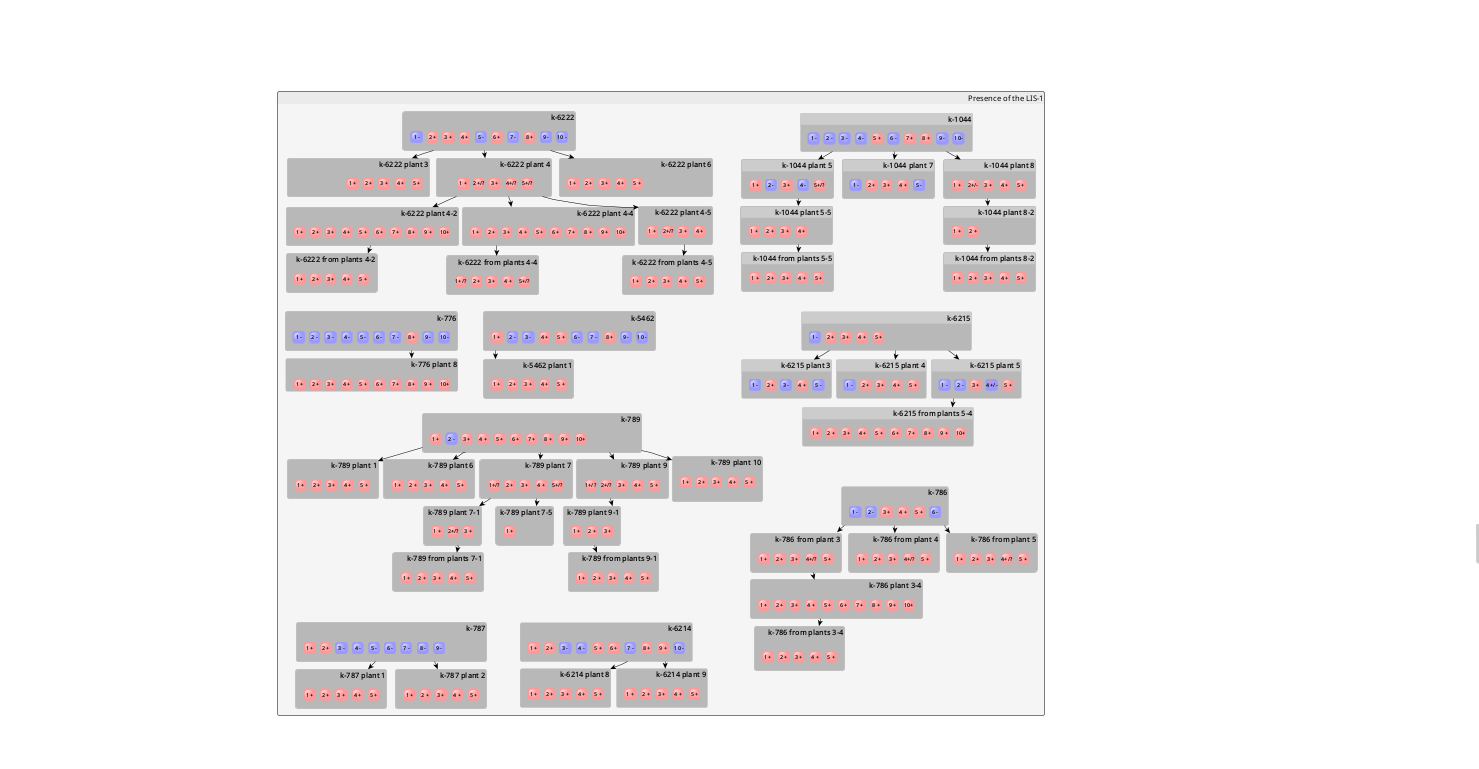

In [16]:
# Figure 7. Reactive stable ones that retained the insertion.
retain_lis = Image.open("presence_lis.png")
display(retain_lis)

### Visualization of shared and individual morphological characteristics of the studied flax varieties grouped by LIS-1 presence.

In [17]:
# Load phenotypes by group
group3 = pd.read_excel("~/db/flax_data_venn.ods", sheet_name='group_3')
group2 = pd.read_excel("~/db/flax_data_venn.ods", sheet_name='group_2')
group1 = pd.read_excel("~/db/flax_data_venn.ods", sheet_name='group_1')
group0 = pd.read_excel("~/db/flax_data_venn.ods", sheet_name='group_0') 
    

In [18]:
# Convert to list characteristics of plants
group_0 = group0['Group_0'].to_list()
group_1 = group1['Group_1'].to_list()
group_2 = group2['Group_2'].to_list()
group_3 = group3['Group_3'].to_list()

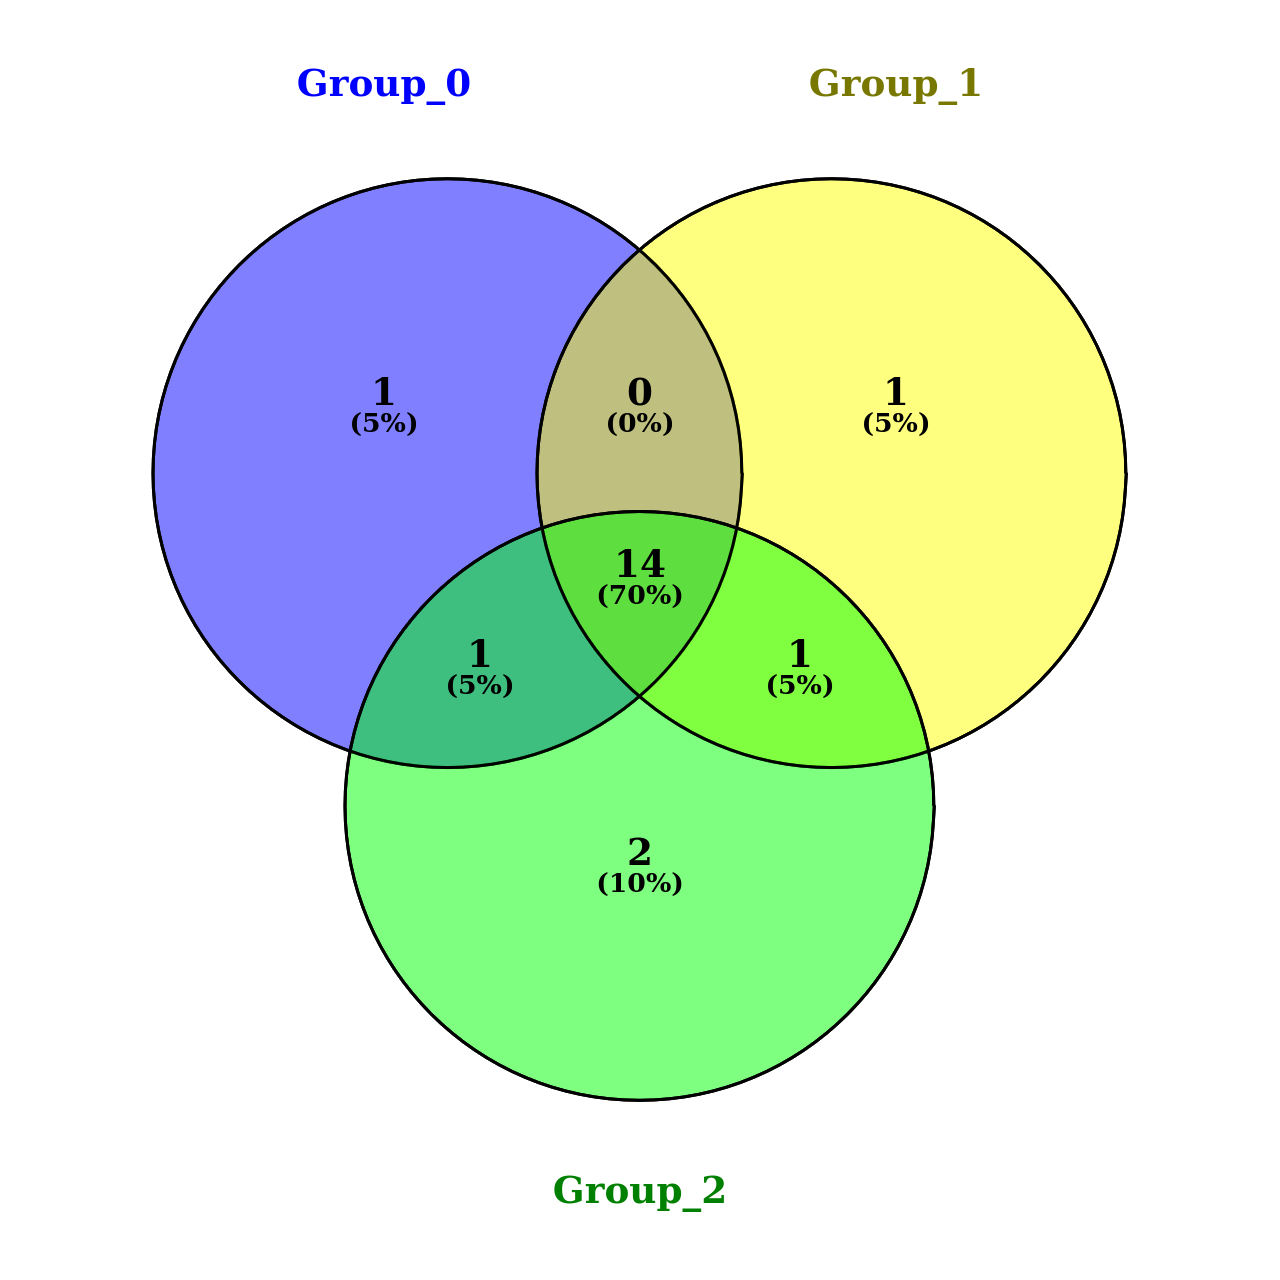

In [19]:
# Figure 8a. Characteristic of the varieties by morphological features between three groups.
myImage2 = Image.open("venny_3_groups.png")
display(myImage2)

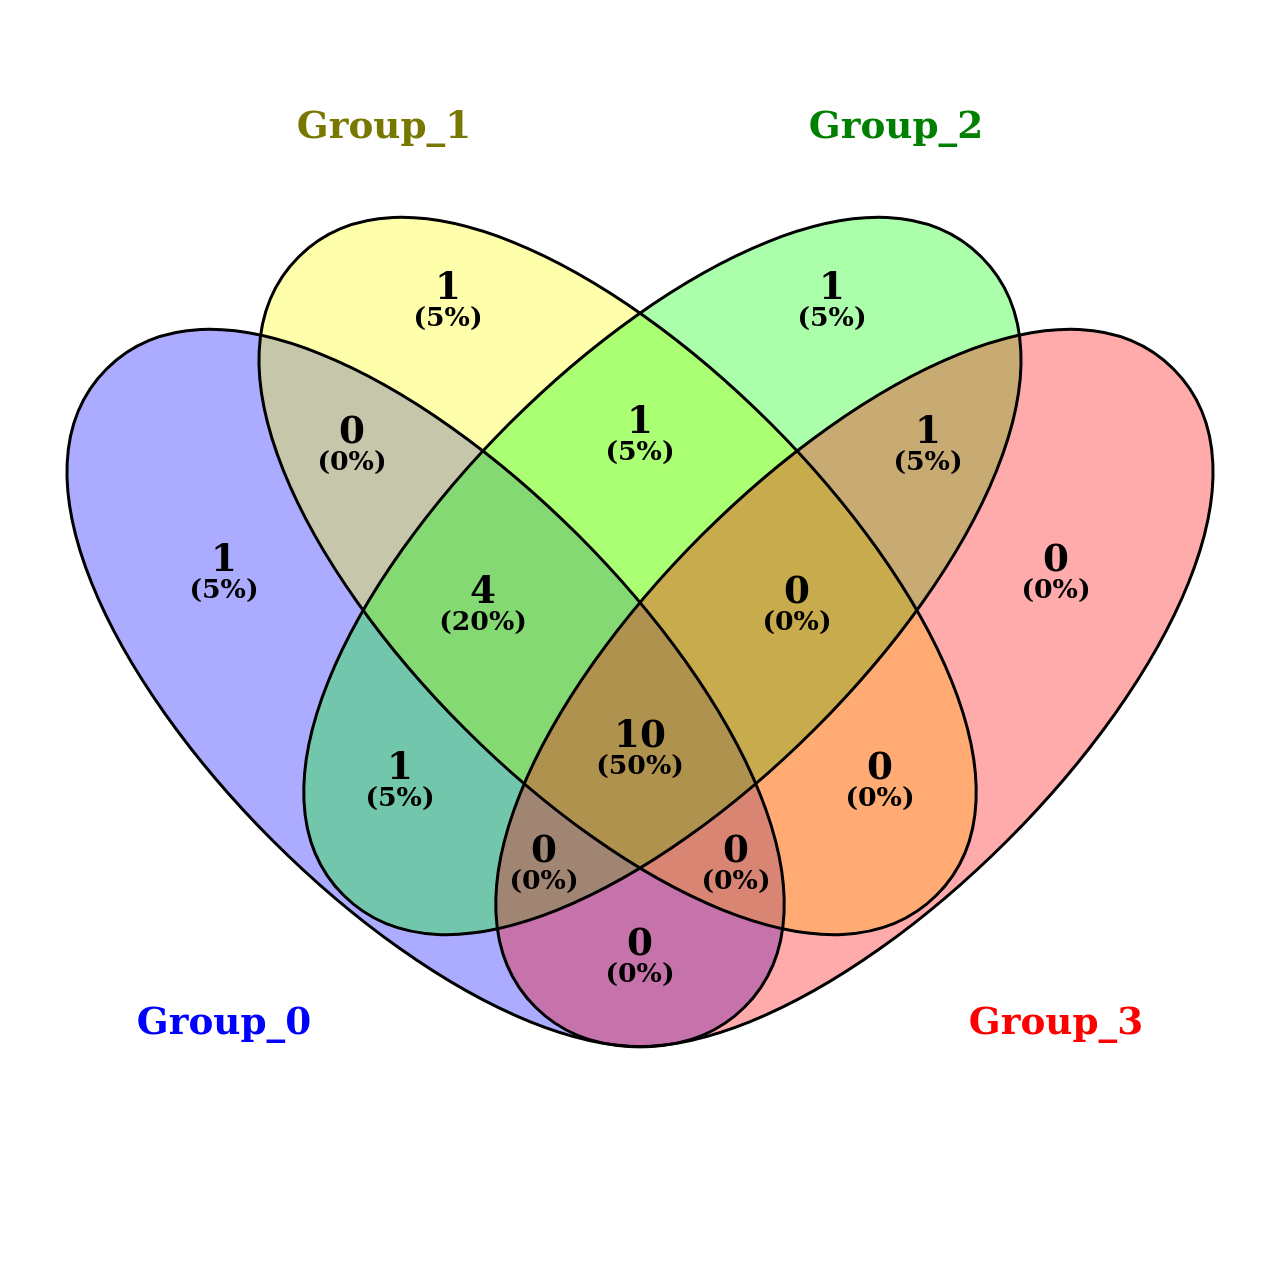

In [20]:
# Figure 8b. Characteristic of the varieties (all four groups) by morphological features.
myImage3 = Image.open("venny_4_groups.png")
display(myImage3)

### Figures 8a, 8b. The eVenn diagramm was used to visualize the shared and individual features of the flax varieties. 
The analysis was run online: Oliveros, J.C. (2007-2015) Venny. An interactive tool for comparing lists with Venn's diagrams. https://bioinfogp.cnb.csic.es/tools/venny/index.html. 

There are 14 shared features between thre groups, and no shared features between group_1 and group_0. 

## Statistical analysis

The dispersion analysis (Mann-Whitney test and one-way ANOVA) run in python 9.13 (python.org; Virtanen et al., 2022; Pedregosa et al., 2011) was applied to reveal the association between the presence of LIS-1 and traits that reflect adaptive ability like plant length and number of seeds per capsule.

In [21]:
# Load database df_fen phenotypes and lis polymorphisms
df_1 = pd.read_excel("~/db/flax_data_anova.ods", sheet_name='anova')
df_1.head()

,Variety,LIS_plastic,plant_length,n_capsules,n_seeds,technical_length
0,k-6222,1,68,4,8,50
1,k-6222,1,50,5,8,42
2,k-6222,1,51,6,8,45
3,k-6222,1,70,6,9,53
4,k-6222,1,62,11,9,47


In [22]:
# Display columns
df_1.columns

Index(['Variety', 'LIS_plastic', 'plant_length', 'n_capsules', 'n_seeds',
       'technical_length'],
      dtype='object')

In [23]:
# Select numeric features
df_anova = df_1[['LIS_plastic', 'plant_length', 'n_capsules', 'n_seeds',
       'technical_length']]

In [24]:
# Get basic statistics by plant length
print(df_anova.groupby('LIS_plastic').agg([np.max, np.min, np.mean, np.median, np.std]).plant_length)

             amax  amin       mean  median       std
LIS_plastic                                         
0              80    49  65.650000    68.0  9.761768
1              71    45  60.141414    60.0  6.065981
pl             80    50  64.976000    65.0  5.864689


#### Table 1 shows the basic statistics on plant length of the varieties by each group.

In [25]:
# Table 1. Basic plant length statistics for each group of flax varieties.
print(df_anova.groupby('LIS_plastic').describe().plant_length)

             count       mean       std   min   25%   50%   75%   max
LIS_plastic                                                          
0             20.0  65.650000  9.761768  49.0  59.0  68.0  74.0  80.0
1             99.0  60.141414  6.065981  45.0  56.5  60.0  65.0  71.0
pl           125.0  64.976000  5.864689  50.0  60.0  65.0  70.0  80.0


#### Table 2 shows the basic statistics on the number of seeds for varieties by each group.

In [26]:
# Table 2. Basic statistics on the number of seeds for each group of flax varieties. 
print(df_anova.groupby('LIS_plastic').describe().n_seeds)

             count      mean       std  min   25%  50%   75%   max
LIS_plastic                                                       
0             20.0  8.000000  0.725476  7.0  7.75  8.0  8.25   9.0
1             99.0  7.747475  1.145919  5.0  7.00  8.0  8.50  10.0
pl           125.0  8.168000  0.830235  6.0  8.00  8.0  9.00  10.0


In [27]:
print(df_anova.groupby('LIS_plastic').describe().technical_length)

             count       mean        std   min   25%   50%    75%   max
LIS_plastic                                                            
0             20.0  55.650000  10.152910  37.0  48.5  60.0  63.25  67.0
1             99.0  48.171717   5.587962  30.0  43.5  50.0  51.50  62.0
pl           125.0  51.120000   5.368066  33.0  48.0  51.0  55.00  62.0


In [28]:
# Slice dataframe - plants with insertion
df_ins = df_anova[df_anova['LIS_plastic'] == 1]

In [29]:
# Get basic statistics
df_ins.describe()

,plant_length,n_capsules,n_seeds,technical_length
count,99.000000,99.000000,99.000000,99.000000
mean,60.141414,6.898990,7.747475,48.171717
std,6.065981,2.052847,1.145919,5.587962
min,45.000000,4.000000,5.000000,30.000000
25%,56.500000,5.000000,7.000000,43.500000
50%,60.000000,7.000000,8.000000,50.000000
75%,65.000000,8.000000,8.500000,51.500000
max,71.000000,13.000000,10.000000,62.000000


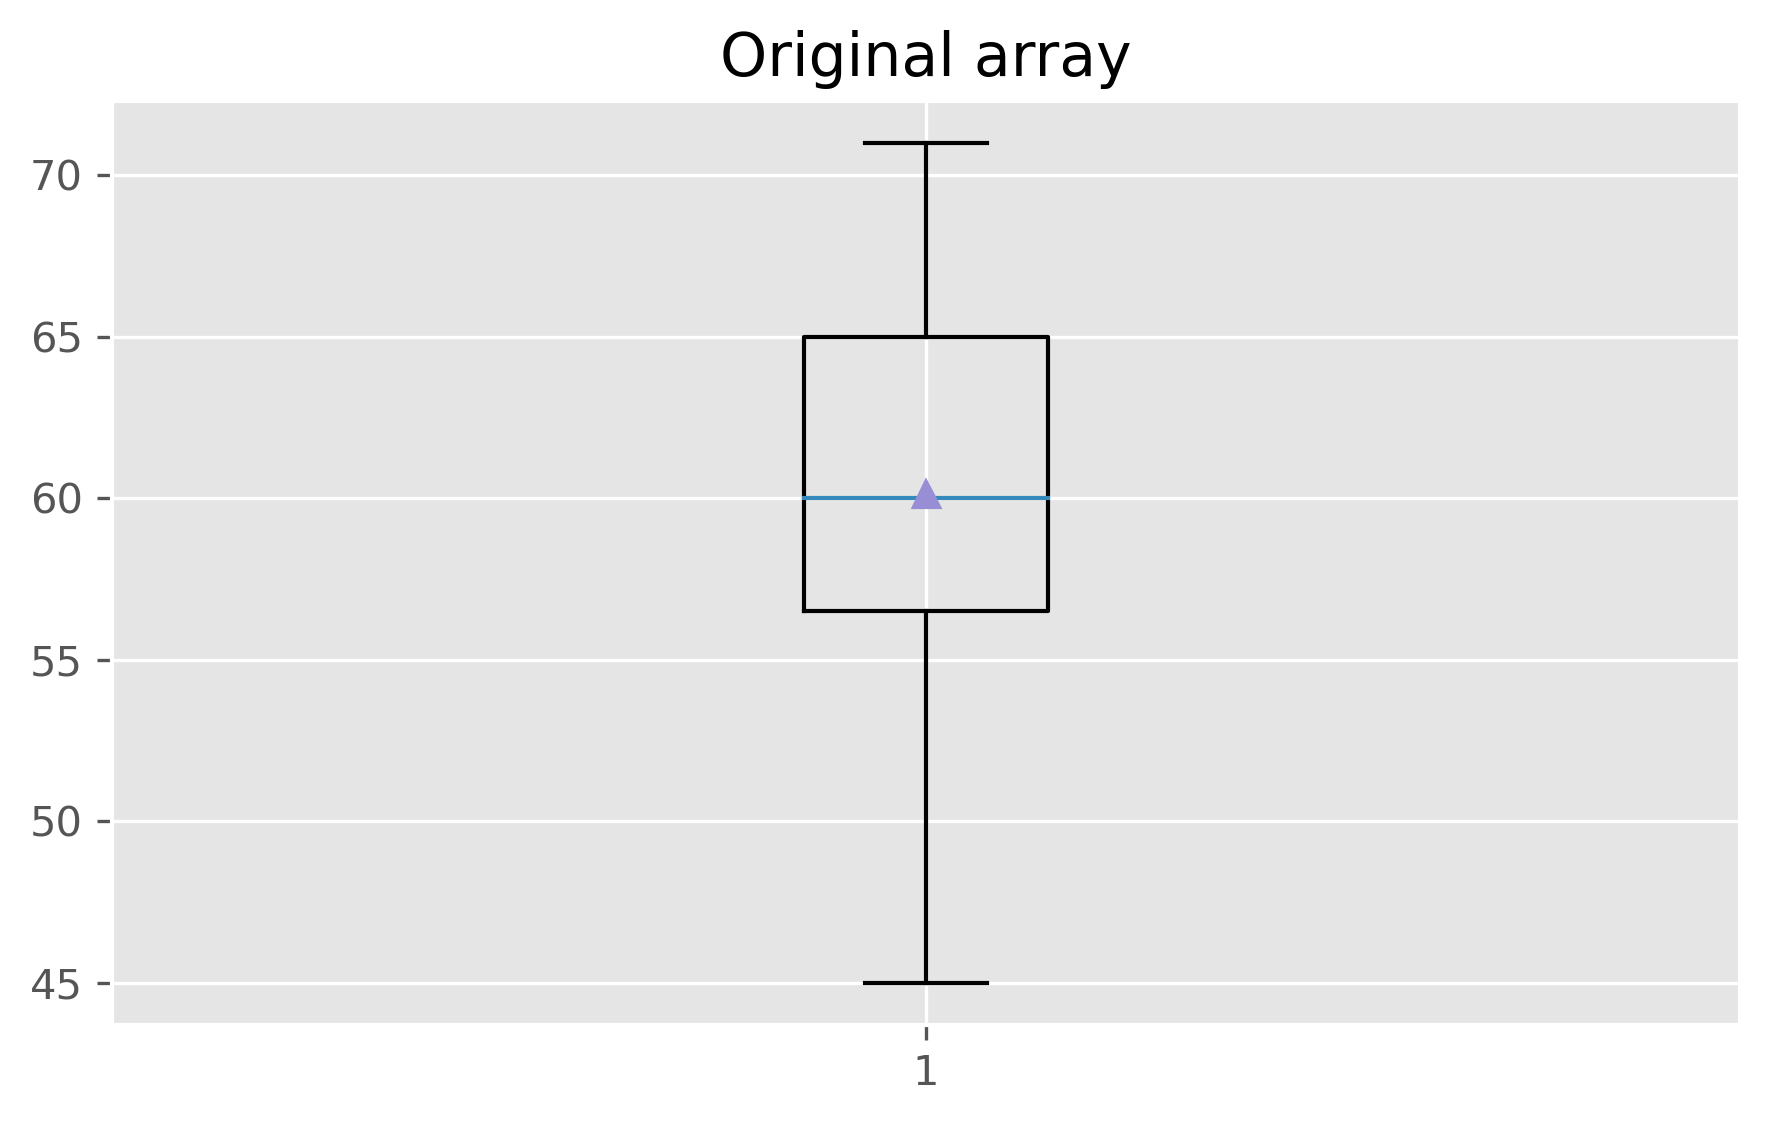

In [30]:
# Vizualize feature 'plant_length' for plants with insertion - detection of the outliers
plt.rcParams.update({'figure.figsize':(7,4), 'figure.dpi':300})

plt.boxplot(df_ins['plant_length'], showmeans= True)
plt.title('Original array')
plt.show()

In [31]:
# Slice dataframe - plants with no insertion
df_no_ins = df_anova[df_anova['LIS_plastic'] == 0]

In [32]:
# Get basic statistics
df_no_ins.describe()

,plant_length,n_capsules,n_seeds,technical_length
count,20.000000,20.000000,20.000000,20.00000
mean,65.650000,6.700000,8.000000,55.65000
std,9.761768,2.386365,0.725476,10.15291
min,49.000000,4.000000,7.000000,37.00000
25%,59.000000,5.000000,7.750000,48.50000
50%,68.000000,7.000000,8.000000,60.00000
75%,74.000000,8.000000,8.250000,63.25000
max,80.000000,14.000000,9.000000,67.00000


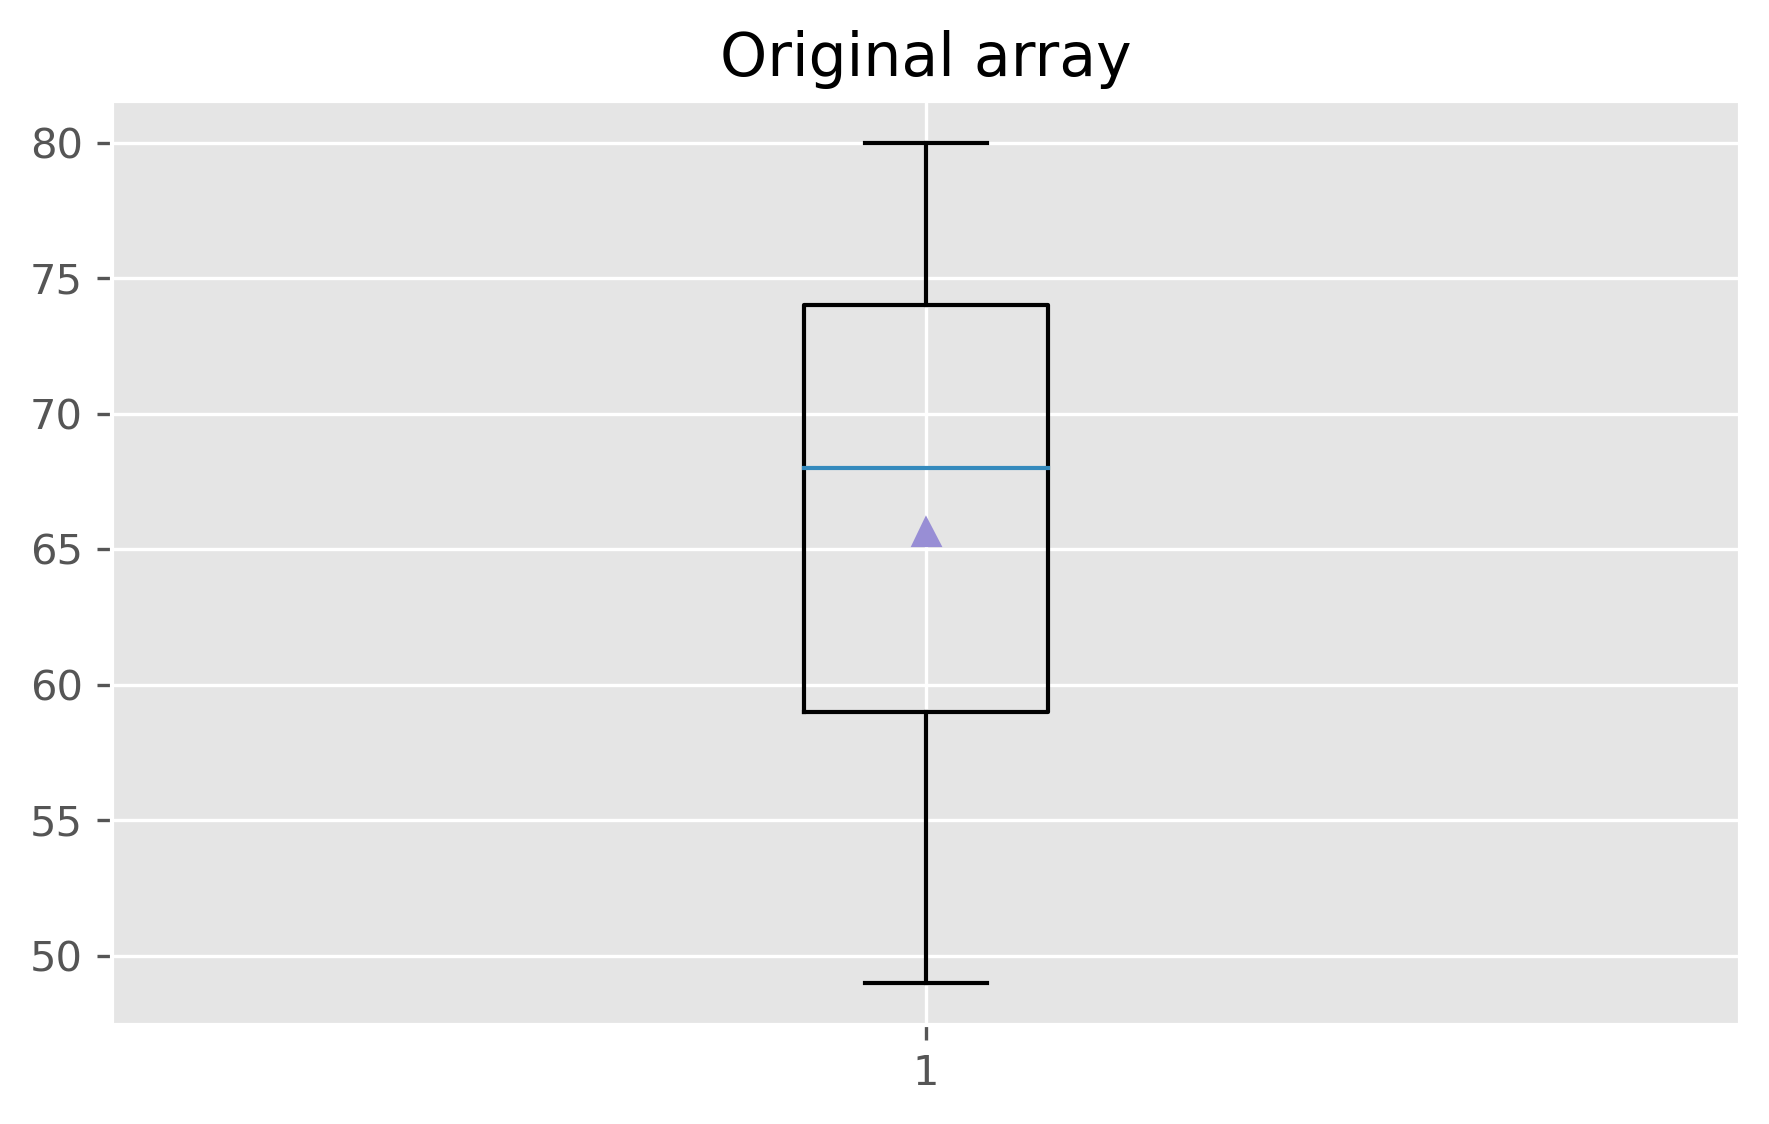

In [33]:
# Vizualize feature 'plant_length' for plants with no insertion - no outliers detected
plt.boxplot(df_no_ins['plant_length'], showmeans= True)
plt.title('Original array')
plt.show()

In [34]:
# Slice dataframe - heterozygote plants
df_pl = df_anova[df_anova['LIS_plastic'] == 'pl']

In [35]:
# Get basic statistics
df_pl.describe()

,plant_length,n_capsules,n_seeds,technical_length
count,125.000000,125.000000,125.000000,125.000000
mean,64.976000,6.496000,8.168000,51.120000
std,5.864689,2.487465,0.830235,5.368066
min,50.000000,1.000000,6.000000,33.000000
25%,60.000000,5.000000,8.000000,48.000000
50%,65.000000,6.000000,8.000000,51.000000
75%,70.000000,8.000000,9.000000,55.000000
max,80.000000,20.000000,10.000000,62.000000


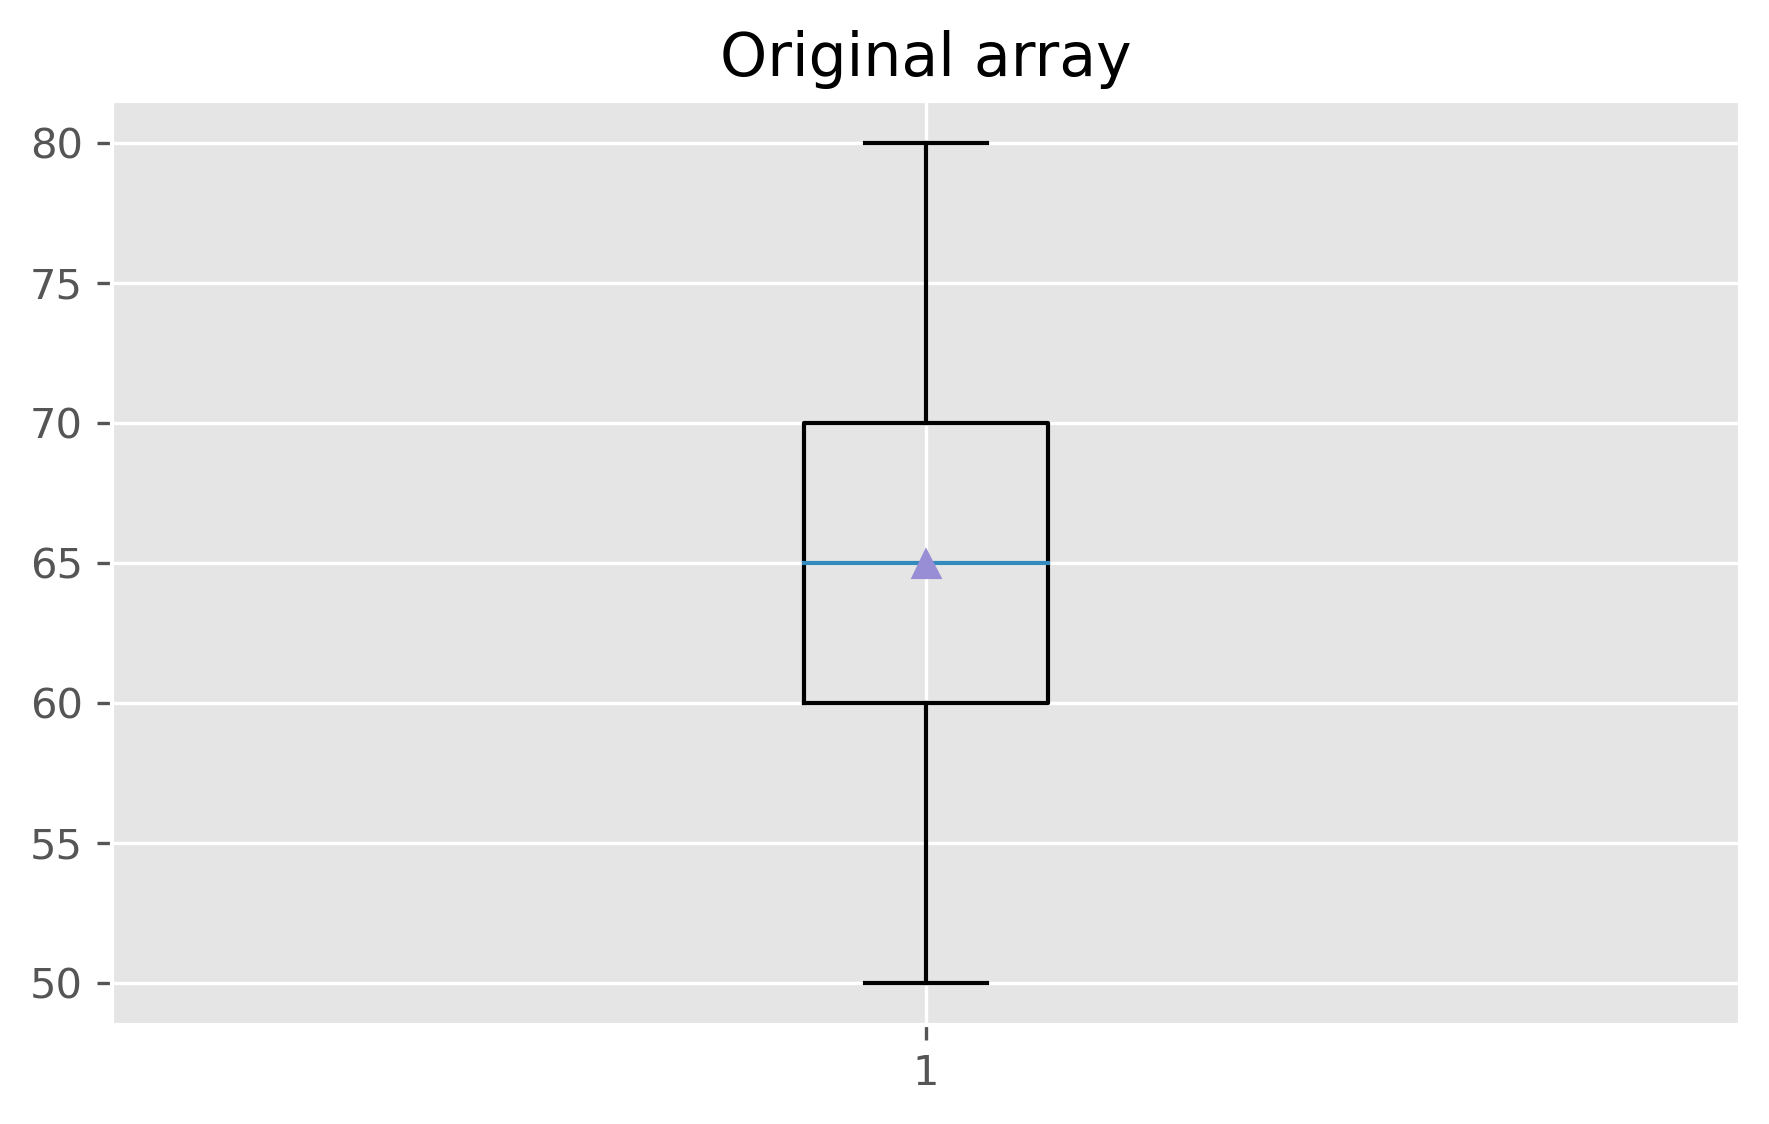

In [36]:
# Vizualize feature 'plant_length' for plants with no insertion - no outliers detected
plt.boxplot(df_pl['plant_length'], showmeans= True)
plt.title('Original array')
plt.show()

In [37]:
# Perfom Levene test to check gomoscedasticity (homogeneity of variance)
stats.levene(df_ins['n_seeds'],
             df_no_ins['n_seeds'],
            df_pl['n_seeds'])

LeveneResult(statistic=2.7488977505534913, pvalue=0.06600583917092001)

P-value = 0.066 means that test for homogeneity of variance is successful, so we will uply parametric methods for analysis (one-way ANOVA).

In [38]:
# Extract individual groups
ins_l = df_ins.loc[(df_ins['LIS_plastic'] == 1), ['n_seeds']]
no_ins_l = df_no_ins.loc[(df_no_ins['LIS_plastic'] == 0), ['n_seeds']]
pl_l = df_pl.loc[(df_pl['LIS_plastic'] == 'pl'), ['n_seeds']]

In [39]:
# ANOVA run to compare groups with insertion and plastic line by number of seeds
fvalue, pvalue = stats.f_oneway(ins_l, pl_l)
print(fvalue, pvalue)

[10.12740692] [0.00166994]


In [40]:
# ANOVA run to compare groups with insertion and withought it by number of seeds
fvalue, pvalue = stats.f_oneway(ins_l, no_ins_l)
print(fvalue, pvalue)

[0.89511405] [0.34604506]


There is statistical significant difference by seed productivity between the two groups: with the LIS-1 and plastic line (p-value = 0.00166994).

In [41]:
# Perform the Brown-Forsythe Test to check gomoscedasticity (homogeneity of variance)
stats.levene(df_ins['plant_length'],
             df_no_ins['plant_length'],
            center = 'median')

LeveneResult(statistic=9.88333545366465, pvalue=0.002113996483139355)

P-value = 0.0021 means that test for homogeneity of variance is failed, so we will uply no-parametric methods for analysis (Mann - Whitneyu test).

In [42]:
# Perform the Brown-Forsythe Test
stats.levene(df_ins['plant_length'],
             df_pl['plant_length'],
            center = 'median')

LeveneResult(statistic=0.0058353717370665786, pvalue=0.9391779372707628)

P-value = 0.9392 means that test for homogeneity of variance is successful, so we will uply parametric methods for analysis (one-way ANOVA).

In [43]:
# Extract individual groups
ins = df_ins.loc[(df_ins['LIS_plastic'] == 1), ['plant_length']]
no_ins = df_no_ins.loc[(df_no_ins['LIS_plastic'] == 0), ['plant_length']]
pl = df_pl.loc[(df_pl['LIS_plastic'] == 'pl'), ['plant_length']]


In [44]:
# ANOVA run to compare groups pl and ins (1)
fvalue, pvalue = stats.f_oneway(pl, ins)
print(fvalue, pvalue)

[36.42014446] [6.60099227e-09]


In [45]:
# Non-parametric test to compare groups ins (1) and no_ins (0)
stats.mannwhitneyu(x=ins, y=no_ins, alternative = 'two-sided')

MannwhitneyuResult(statistic=array([604.]), pvalue=array([0.0059963]))

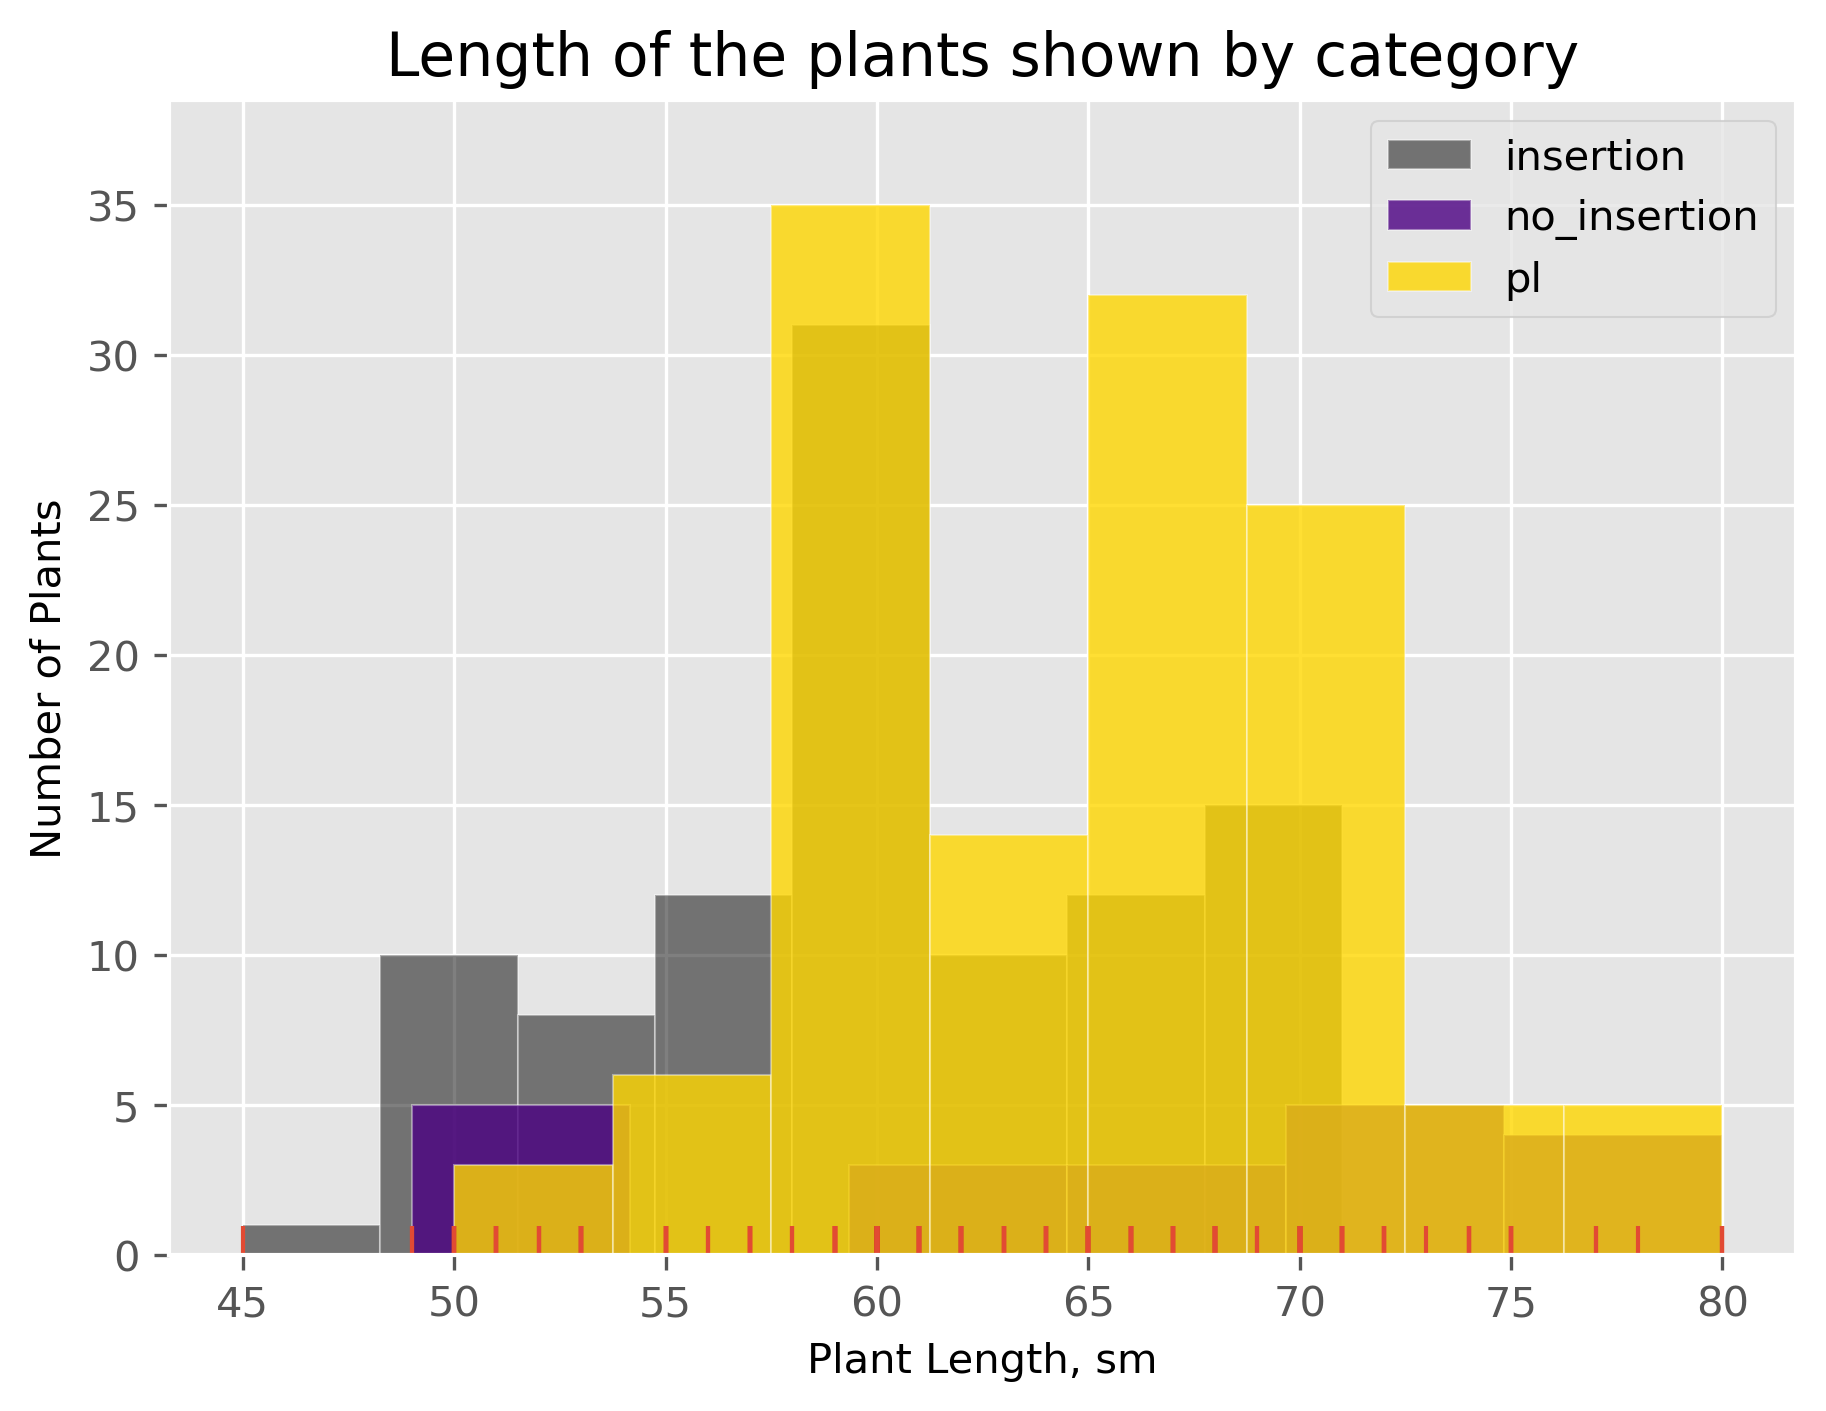

In [46]:
# Figure 9. Distribution of groups of flax varieties along the length of the plant.
plt.style.use('ggplot')
plt.rcParams.update({'figure.dpi':300})
#plt.style.use('fivethirtyeight')
f,ax = plt.subplots(figsize = (7,5))
sns.histplot(df_ins[df_ins.LIS_plastic == 1].plant_length, ax = ax, label = 'insertion', color = 'black', alpha=.5, edgecolor=(1, 1, 1, .4))
sns.histplot(df_no_ins[df_no_ins.LIS_plastic == 0].plant_length, ax = ax, label = 'no_insertion', color = 'indigo', alpha=.8, edgecolor=(1, 1, 1, .4))
sns.histplot(df_pl[df_pl.LIS_plastic == 'pl'].plant_length, ax = ax, label = 'pl', color = 'gold', alpha=.8, edgecolor=(1, 1, 1, .4))   
sns.rugplot(df_anova, x="plant_length")
plt.title('Length of the plants shown by category') #Number of plants of a certain length shown by category
plt.xlabel('Plant Length, sm')
plt.ylabel('Number of Plants')
#ax.set_yscale('log')
plt.legend()
plt.show()

### Figure 9. The distribution of groups of flax varieties by the plant length.

## ANOVA results

To test the hypothesis about the equality of variances, the Levin test was carried out in groups by the number of seeds (pvalue=0.0660), the Brown-Forsythe test on the trait "plant length" (pvalue=0.0021 for groups "0" and "1"; pvalue=0.9391 for groups "1" and "pl").

As a result, a statistically significant difference was found in the number of seeds between groups "1" and "pl": p-value = 0.00167. By the length of the plant, the Mann-Whitney test showed a significant difference between groups "1" and "0" (p-value = 0.006) and a one-factor ANOVA between groups "1" and "pl" (p-value = 6.6e-9).

As a result, the group of varieties that formed and retained the insertion is characterized by a shorter plant length and fewer seeds than the groups of varieties that formed and lost the insertion (partially or completely). 

# Bionformatics analysis

For the analysis, a sample of 56 plants with known biometric characteristics was taken. These characteristics of plants include: plant length, number of capsules, number of seeds in a capsule, technical plant length, hairs on the false septa of the capsule, and the presence of anthocyanin pigmentation in the hypocotyl.

In [47]:
# Load database df_fen phenotypes and lis polymorphisms
df_nums = pd.read_excel("~/db/flax_data_anova.ods", sheet_name='ml')
df_nums.head()

,variety,lis_hetero,lis1,hairy,hairs_number,plant_length,n_capsules,n_seeds,technical_length,hypo_antho,hypo_length,cotyledon_leaves_l,sowing_seedlings,shoots_flowering,flowering_ripening,sowing_ripening
0,k-6222,1,1,hairy,HH,70,10,9,57,missed,11,11,9,40,31,80
1,k-6222,1,1,hairy,Hh,65,10,8,45,missed,11,11,9,40,31,80
2,k-6222,1,1,hairy,HH,79,11,9,62,missed,11,11,9,40,31,80
3,k-6222,1,1,hairy,Hh,72,9,8,48,missed,11,11,9,40,31,80
4,k-6222,1,1,hairy,Hh,61,4,7,53,missed,11,11,9,40,31,80


In [48]:
# Get info about data - data types, missing values
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   variety             56 non-null     object
 1   lis_hetero          56 non-null     int64 
 2   lis1                56 non-null     int64 
 3   hairy               56 non-null     object
 4   hairs_number        56 non-null     object
 5   plant_length        56 non-null     int64 
 6   n_capsules          56 non-null     int64 
 7   n_seeds             56 non-null     int64 
 8   technical_length    56 non-null     int64 
 9   hypo_antho          56 non-null     object
 10  hypo_length         56 non-null     int64 
 11  cotyledon_leaves_l  56 non-null     int64 
 12  sowing_seedlings    56 non-null     int64 
 13  shoots_flowering    56 non-null     int64 
 14  flowering_ripening  56 non-null     int64 
 15  sowing_ripening     56 non-null     int64 
dtypes: int64(12), object(4)
memo

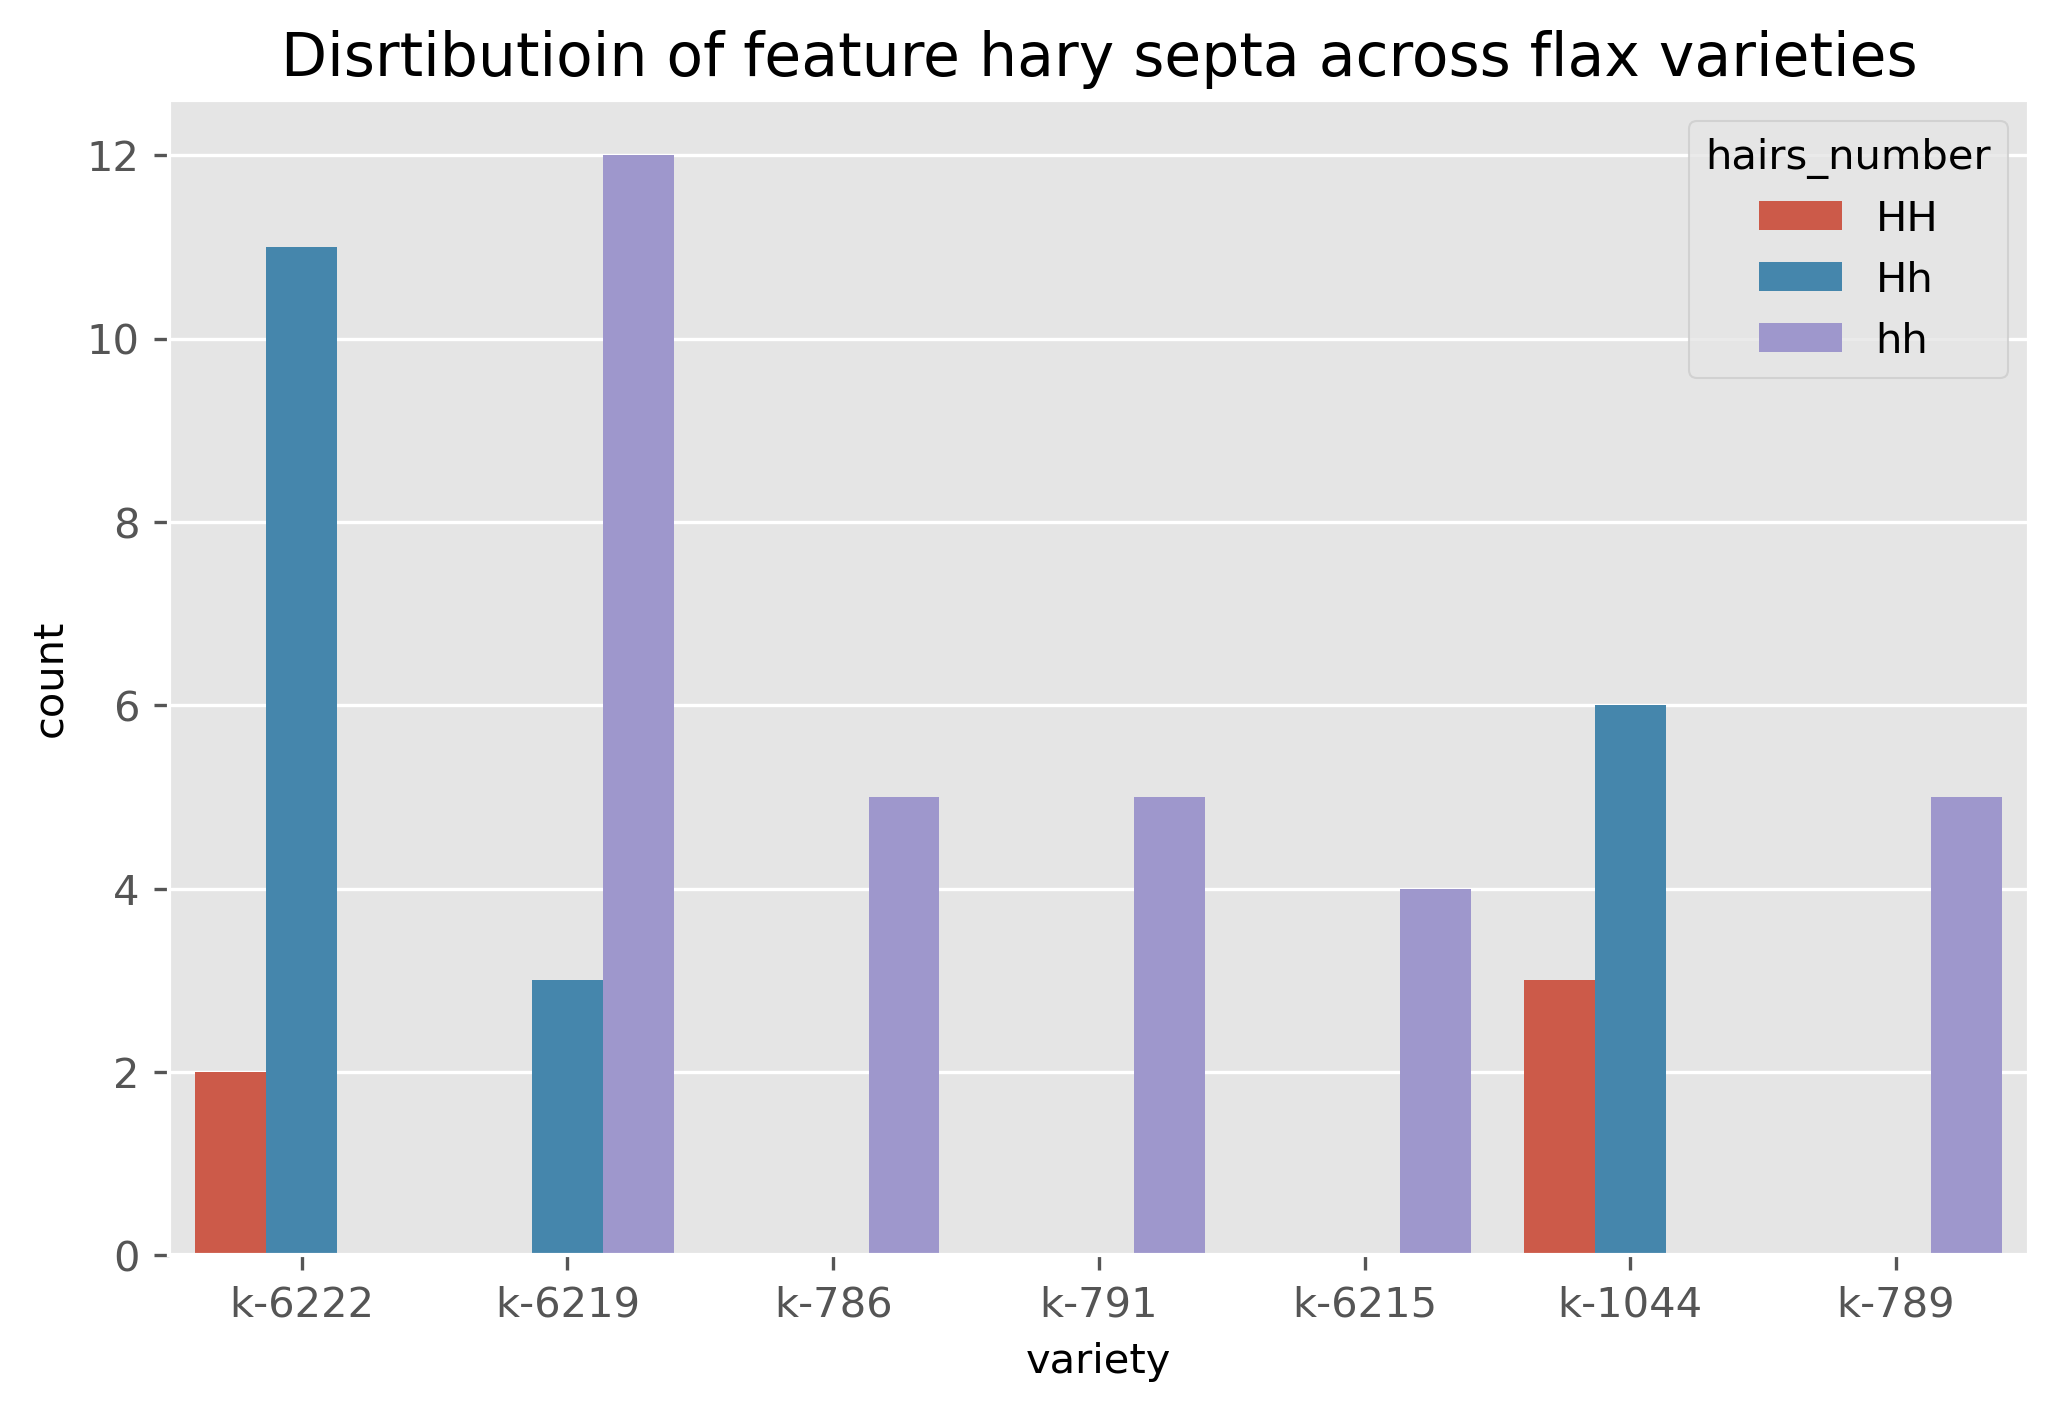

In [49]:
# Disrtibutioin of the feature hary septa across flax varieties is shown
plt.rcParams.update({'figure.figsize':(8,5), 'figure.dpi':300})
sns.countplot(x='variety', data=df_nums, hue='hairs_number')
plt.title("Disrtibutioin of feature hary septa across flax varieties")
plt.show()

### Dataset preparation

In [50]:
# Import modul 
from sklearn.preprocessing import StandardScaler

In [51]:
# Transform categorical features to dummy format
df_cat = pd.get_dummies(df_nums[['hairs_number', 'hypo_antho']], drop_first=True)

In [52]:
# Get numeric features
X_nums = df_nums.drop(['hairs_number', 'hypo_antho'], axis=1)

In [53]:
# Concatenate encoded categorical features and numeric features
X_combo = pd.concat([df_cat, X_nums], axis=1)

In [54]:
# Increasing the dataset size in 3 times as we have originally only 56 samples
X_sample = X_combo.sample(frac=3, replace=True, random_state=1)

In [55]:
# Drop unnecessary fearures 
X = X_sample.drop(['variety', 'lis1', 'hairy', 'sowing_seedlings', 'shoots_flowering', 'flowering_ripening', 'sowing_ripening', 'cotyledon_leaves_l', 'hypo_length'], axis=1)

In [56]:
# Display list of features
X.columns

Index(['hairs_number_Hh', 'hairs_number_hh', 'hypo_antho_weak', 'lis_hetero',
       'plant_length', 'n_capsules', 'n_seeds', 'technical_length'],
      dtype='object')

In [57]:
# Get info about datatypes and missing values
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 37 to 18
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   hairs_number_Hh   168 non-null    uint8
 1   hairs_number_hh   168 non-null    uint8
 2   hypo_antho_weak   168 non-null    uint8
 3   lis_hetero        168 non-null    int64
 4   plant_length      168 non-null    int64
 5   n_capsules        168 non-null    int64
 6   n_seeds           168 non-null    int64
 7   technical_length  168 non-null    int64
dtypes: int64(5), uint8(3)
memory usage: 8.4 KB


In [58]:
# Get basic statistics by plant length for three groups of plants divided by LIS-1 condition
print(X.groupby('lis_hetero').describe().technical_length)

            count       mean       std   min   25%   50%   75%   max
lis_hetero                                                          
0            28.0  47.964286  7.421102  36.0  43.0  48.5  55.0  55.0
1           116.0  47.120690  8.277949  32.0  42.0  47.5  56.0  62.0
2            24.0  46.125000  5.219633  40.0  41.5  46.0  50.0  53.0


## ML model - Random Forest Classifier and LIS-1 presence prediction

In [59]:
# Split dataset to target variable and features
X_forest = X.drop(columns=['lis_hetero'], axis=1)
X_forest.columns

Index(['hairs_number_Hh', 'hairs_number_hh', 'hypo_antho_weak', 'plant_length',
       'n_capsules', 'n_seeds', 'technical_length'],
      dtype='object')

In [60]:
# Labels for prediction
y = X_sample[['lis_hetero']]
y_forest = y

In [61]:
# Prediction of LIS_hetero based on the data
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [62]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_forest, y_forest, test_size=0.3, 
                                                    random_state=46, stratify=y_forest)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [63]:
# Data standartization
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [64]:
# GridsearchCV and hyperparameters tunning to find the best solution for prediction
# Create the parameter grid
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [3, 5, 7, 10],
    'criterion': ['gini', 'entropy'],
    'n_estimators': [600, 800, 1000]
}
# Use KFold cross-validation when split the data

kf = KFold(n_splits=10, shuffle=True, random_state=43)

# Create a based model
forest = RandomForestClassifier(random_state=13)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = forest, param_grid = param_grid, 
                          cv = kf, n_jobs = -1, verbose = 2, error_score='raise')


In [65]:
# Fit the grid search to the data
grid_search.fit(X_train_std, y_train.ravel())

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] END bootstrap=True, criterion=gini, max_depth=3, n_estimators=600; total time=   4.2s
[CV] END bootstrap=True, criterion=gini, max_depth=3, n_estimators=600; total time=   4.4s
[CV] END bootstrap=True, criterion=gini, max_depth=3, n_estimators=600; total time=   4.2s
[CV] END bootstrap=True, criterion=gini, max_depth=3, n_estimators=800; total time=   6.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, n_estimators=800; total time=   6.2s
[CV] END bootstrap=True, criterion=gini, max_depth=3, n_estimators=1000; total time=   7.5s
[CV] END bootstrap=True, criterion=gini, max_depth=3, n_estimators=1000; total time=   6.9s
[CV] END bootstrap=True, criterion=gini, max_depth=3, n_estimators=1000; total time=   6.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, n_estimators=600; total time=   3.8s
[CV] END bootstrap=True, criterion=gini, max_depth=5, n_estimators=600; total time=   3.6s
[CV] END bootstrap=True,

GridSearchCV(cv=KFold(n_splits=10, random_state=43, shuffle=True),
             error_score='raise',
             estimator=RandomForestClassifier(random_state=13), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [600, 800, 1000]},
             verbose=2)

In [66]:
#Find the best values
print("The best parameters: {0}".format(grid_search.best_params_))

The best parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 1000}


In [67]:
# Set the best params to classificator
forest.set_params(**grid_search.best_params_)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=1000,
                       random_state=13)

In [68]:
# Print hyperparameters used
from pprint import pprint
print('Parameters currently in use:\n')
pprint(forest.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 13,
 'verbose': 0,
 'warm_start': False}


In [69]:
# Fit the model on train data
forest.fit(X_train_std, y_train.ravel())
display(forest.score(X_train_std, y_train))

0.9914529914529915

In [70]:
# Predict the test set
y_pred = forest.predict(X_test_std)
accuracy = accuracy_score(y_pred, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}%".format(accuracy))

Accuracy with RandomForest: 98.039216%


<Axes: >

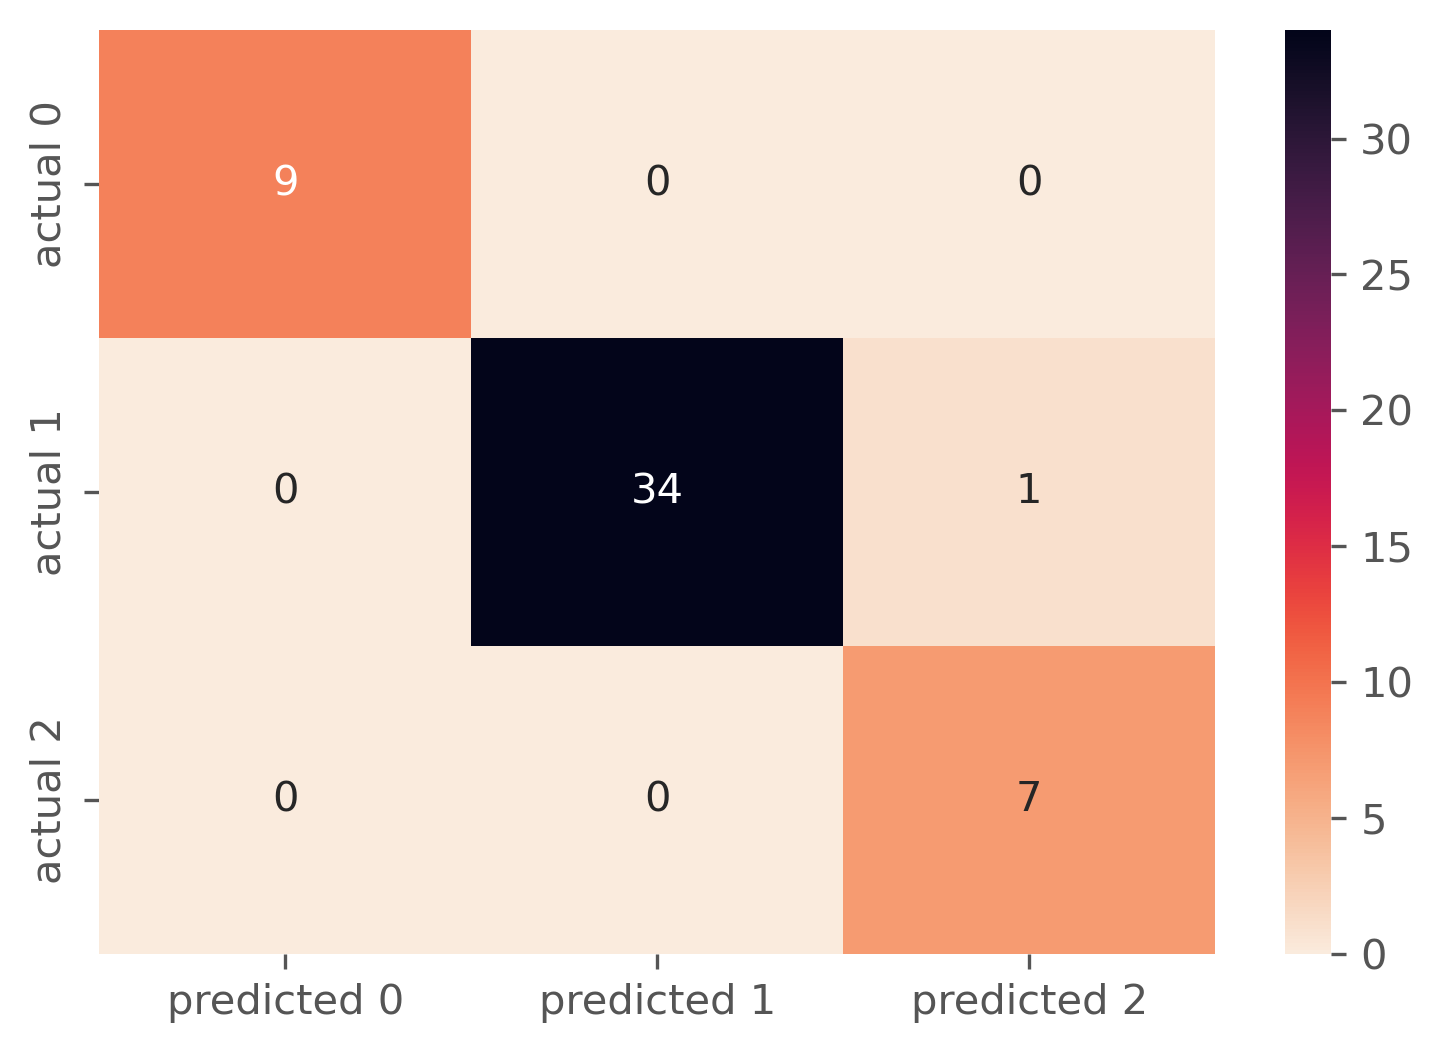

In [71]:
# The confusion matrix shows prediction results

conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['actual 0', 'actual 1', 'actual 2'], 
                           columns = ['predicted 0', 'predicted 1', 'predicted 2'])
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':300})
display(sns.heatmap(conf_matrix, annot=True, cmap='rocket_r'))

### Figure 11 (3). Confusion matrix. 
Of the 51 objects, 34 are correctly classified, belonging to class "1", 9 belong to class "0", and 7 are heterozygotes (class "2"). One object was erroneously assigned to class "2" (in fact, class "1").

In [72]:
#Classification accuracy
from sklearn.metrics import classification_report

#Classification accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.97      0.99        35
           2       0.88      1.00      0.93         7

    accuracy                           0.98        51
   macro avg       0.96      0.99      0.97        51
weighted avg       0.98      0.98      0.98        51



For class "0" (no LIS-1) precision, recall, and f1-score = 1. For class "2" (heterozygotes), precision = 0.88 (which shows the proportion of positive identifications that were actually correct using formula: TP/(TP+FP), i.e., false positive results); recall = 1 (which shows the proportion of actual positives correctly identified using formula: TP/(TP+FN), i.e., false negative results); f1-score = 0.93 (which is the weighted average of precision and recall). Therefore, this score takes both false positives and false negatives into account using the formula: 2*(Recall * Precision) / (Recall + Precision)). For class "1", precision = 1; recall = 0.97; f1-score = 0.99. So, groups with LIS-1 and heterozygotes based on studied morphological characteristics could be misclassified. 

The average accuracy of predictions was 0.98.

In [73]:
# Features and its importances estimated with Random Forest Classifier
feature_imp = pd.Series(forest.feature_importances_,index=X_forest.columns).sort_values(ascending=False)
feature_imp

technical_length    0.202328
plant_length        0.201680
n_capsules          0.187276
hairs_number_hh     0.131706
n_seeds             0.113984
hypo_antho_weak     0.098699
hairs_number_Hh     0.064328
dtype: float64

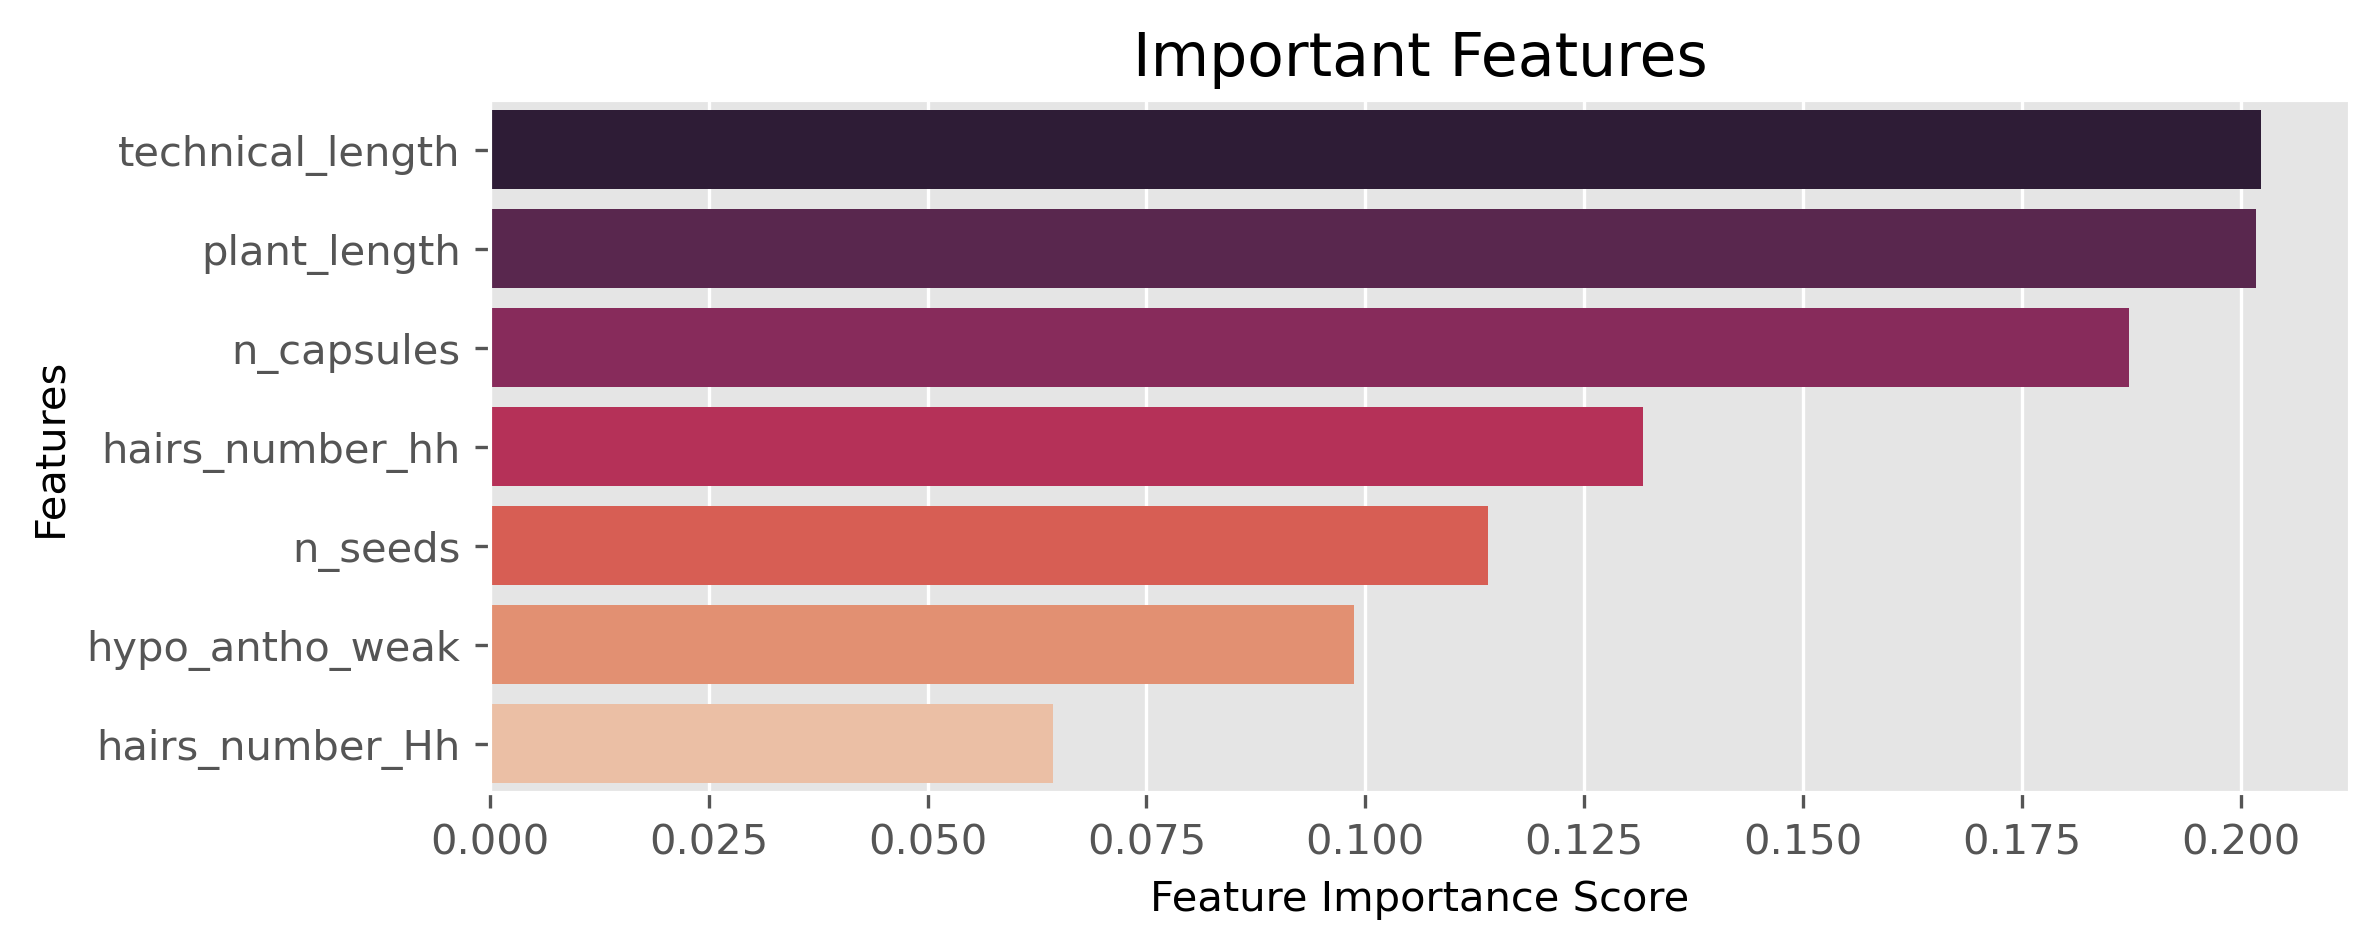

In [74]:
# Bar plot of features and its importances estimated with Random Forest Classifier
plt.style.use('ggplot')
plt.rcParams.update({'figure.figsize':(8,3), 'figure.dpi':300})
sns.barplot(x=feature_imp, y=feature_imp.index,  palette = 'rocket')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features')
plt.show()

Figure 12. Feature Importance Scores.
More than 10% of the importance is calculated for the first five characteristics: technical_length: 20.2328%, plant_length: 20.1680%, n_capsules: 18.7276%, hairs_number_hh: 13.1706%, and n_seeds: 11.3984%.

### Conclusion
A statistically significant difference was found by the number of seeds between groups "1" and "pl". By the length of the plant, a significant difference revealed between the groups "1" and "0", and between the groups "1" and "pl".
Among the 29 local varieties studied, four groups were identified based on their ability to modify their genome using LIS-1 as a molecular marker of genome plasticity. The most promising in terms of adaptive capabilities to environmental stress (mineral and water nutrition excess) is the group of varieties that preserved the ability to form and lose the LIS-1 (group "pl") and thus be successful both under normal and stressful growth conditions. Existing associations between patterns of LIS-1 sequence presence and morphological traits of flax allows us to make classification with 98.039% accuracy.